# TRABALHO PRÁTICO DE IA - TRABALHO 3

Alunos:

        1. Thiago Rodrigo Monteiro Salgado - Engenharia da Computação (21954456)
        2. João Victor de Carvalho Marques - Engenharia da Computação (21952894)
        3. Erllison de Queiroz Reis - Ciência da Computação (22152252)
        4. Francisco Rivail Santos da Luz Junior  - Ciência da Computação (22152249)

In [ ]:
import sys
import os

In [ ]:
# %config InlineBackend.figure_format = 'retina' # Make visualizations look good
# #%config InlineBackend.figure_format = 'svg'
# %matplotlib inline

# if 'google.colab' in sys.modules:
#   !pip install -q dtreeviz

In [ ]:
%config InlineBackend.figure_format = 'retina'
#%config InlineBackend.figure_format = 'svg'
%matplotlib inline

!pip install -q dtreeviz fuzzy-c-means

In [ ]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.graph_objects as go


from fcmeans import FCM
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import dtreeviz
import logging
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

Função para retornar CSV passado pelo Professor, para evitar de fazer upload de CSV o tempo inteiro que o Colab reinicia.

In [155]:
import pandas as pd
from io import StringIO

def load_trains_data():
    """
    Retorna os dados do dataset trains_data como um DataFrame.
    """
    csv_data = """Number_of_cars,Number_of_different_loads,num_wheels1,length1,shape1,num_loads1,load_shape1,num_wheels2,length2,shape2,num_loads2,load_shape2,num_wheels3,length3,shape3,num_loads3,load_shape3,num_wheels4,length4,shape4,num_loads4,load_shape4,Rectangle_next_to_rectangle,Rectangle_next_to_triangle,Rectangle_next_to_hexagon,Rectangle_next_to_circle,Triangle_next_to_triangle,Triangle_next_to_hexagon,Triangle_next_to_circle,Hexagon_next_to_hexagon,Hexagon_next_to_circle,Circle_next_to_circle,Class_attribute
4,3,2,long,closedrect,3,rectanglod(short),2,short,openrect,1,trianglod,2,long,openrect,1,rectanglod(long),None,None,None,None,None,0,1,0,0,0,0,0,0,0,0,east
4,2,2,short,openrect,1,circlelod,2,short,closedtrap,1,trianglod,2,short,openrect,2,circlelod,None,None,None,None,None,0,0,0,0,0,0,1,0,0,0,east
4,3,2,short,closedrect,1,circlelod,2,short,openrect,1,rectanglod(medium),2,short,ushaped,1,trianglod,None,None,None,None,None,0,1,0,0,0,0,0,0,0,0,east
5,4,2,short,openrect,1,rectanglod(medium),2,long,openrect,3,rectanglod(short),2,short,ushaped,1,trianglod,2,short,opentrap,1,circlelod,1,1,0,0,0,0,1,0,0,0,east
4,3,2,short,ushaped,1,rectanglod(medium),2,short,closedtrap,1,circlelod,2,short,closedrect,1,trianglod,None,None,None,None,None,0,0,0,1,0,0,0,0,0,0,east
4,1,2,short,ushaped,1,circlelod,2,short,opentrap,1,circlelod,2,short,opentrap,2,circlelod,None,None,None,None,None,0,0,0,0,0,0,0,0,0,1,east
5,4,2,long,closedrect,1,rectanglod(long),2,short,openrect,1,circlelod,2,short,ushaped,1,rectanglod(medium),2,short,openrect,1,trianglod,0,1,0,1,0,0,0,0,0,0,east
3,2,2,short,ushaped,1,trianglod,2,short,dbclosedrect,1,rectanglod(medium),None,None,None,None,None,None,None,None,None,None,0,0,0,0,0,0,0,0,0,0,east
5,3,2,long,closedrect,2,invtrianglod,3,long,openrect,1,rectanglod(long),2,short,opentrap,1,circlelod,2,short,openrect,1,circlelod,0,0,0,1,0,0,0,0,0,1,east
3,2,3,long,openrect,1,rectanglod(long),2,short,ushaped,1,circlelod,None,None,None,None,None,None,None,None,None,None,0,0,0,1,0,0,0,0,0,0,east
5,2,2,short,openrect,1,trianglod,2,short,closedtrap,1,trianglod,3,long,openrect,3,rectanglod(short),2,short,ushaped,1,trianglod,0,1,0,0,1,0,0,0,0,0,east
5,2,2,short,ushaped,2,trianglod,2,short,opentrap,1,rectanglod(medium),2,short,openrect,1,rectanglod(medium),2,short,ellipse,1,rectanglod(medium),1,0,0,0,0,0,0,0,0,0,east
3,2,2,short,ellipse,1,trianglod,2,short,ushaped,1,circlelod,None,None,None,None,None,None,None,None,None,None,0,0,0,0,0,0,1,0,0,0,east
5,3,2,long,jaggedtop,1,rectanglod(long),2,short,openrect,1,trianglod,2,short,openrect,1,trianglod,2,short,dbsloptop,1,circlelod,0,1,0,0,1,0,1,0,0,0,east
3,2,2,short,ushaped,1,trianglod,2,short,opentrap,1,rectanglod(medium),None,None,None,None,None,None,None,None,None,None,0,0,0,1,0,0,0,0,0,0,east
3,2,2,short,openrect,1,circlelod,2,short,openrect,1,trianglod,None,None,None,None,None,None,None,None,None,None,0,0,0,0,0,0,0,0,0,0,east
5,3,2,short,ushaped,1,trianglod,2,long,closedrect,1,circlelod,2,short,closedrect,1,circlelod,2,long,openrect,1,rectanglod(long),0,0,0,1,0,0,1,0,0,1,east
5,3,2,short,opentrap,1,trianglod,2,short,dbclosedrect,1,diamondlod,2,long,openrect,3,rectanglod(short),2,short,ushaped,1,diamondlod,0,0,1,0,0,1,0,0,0,0,east
4,3,2,short,ellipse,1,rectanglod(medium),2,short,ushaped,1,trianglod,2,short,opentrap,2,circlelod,None,None,None,None,None,0,1,0,0,0,0,1,0,0,0,east
4,2,2,short,openrect,1,circlelod,2,short,openrect,1,trianglod,2,short,opentrap,1,trianglod,None,None,None,None,None,0,0,0,0,1,0,0,0,0,0,east
4,3,2,long,openrect,1,rectanglod(long),3,long,closedrect,1,invtrianglod,2,short,ellipse,1,invtrianglod,None,None,None,None,None,0,1,0,0,0,0,1,0,0,0,east
4,2,2,short,openrect,1,trianglod,2,short,dblopnrect,1,diamondlod,2,short,ushaped,1,trianglod,None,None,None,None,None,0,0,0,0,0,1,0,0,0,0,east
4,2,2,short,openrect,1,rectanglod(medium),2,short,hexagon,1,circlelod,3,long,openrect,None,None,None,None,None,None,None,0,0,0,1,0,0,0,0,0,0,east
5,2,2,short,openrect,1,circlelod,2,short,openrect,1,circlelod,2,short,openrect,1,trianglod,2,short,openrect,1,trianglod,0,0,0,0,1,0,0,0,0,1,east
5,2,2,long,jaggedtop,1,circlelod,2,long,openrect,2,circlelod,2,short,ushaped,1,circlelod,2,short,sloptop,1,diamondlod,0,0,0,0,0,0,0,0,0,1,east
5,2,2,short,closedtrap,1,circlelod,2,short,opentrap,1,trianglod,2,short,opentrap,2,circlelod,2,short,closedrect,1,trianglod,0,0,0,0,0,0,1,0,0,0,west
4,3,2,long,openrect,3,rectanglod(short),2,short,opentrap,1,trianglod,2,short,openrect,1,circlelod,None,None,None,None,None,0,1,0,0,0,0,1,0,0,0,west
4,2,2,short,openrect,1,circlelod,3,long,closedrect,1,hexaglod,2,short,dblopnrect,1,circlelod,None,None,None,None,None,0,0,0,0,0,0,0,0,1,0,west
3,2,2,short,openrect,1,circlelod,2,short,closedrect,1,rectanglod(medium),None,None,None,None,None,None,None,None,None,None,0,0,0,1,0,0,0,0,0,0,west
5,4,2,short,dblopnrect,1,circlelod,2,short,sloptop,1,trianglod,3,long,jaggedtop,1,rectanglod(long),2,short,openrect,1,diamondlod,0,1,0,0,0,0,1,0,0,0,west
5,4,3,long,closedrect,3,hexaglod,2,long,openrect,3,rectanglod(short),2,short,openrect,1,trianglod,2,long,closedrect,1,rectanglod(long),0,1,1,0,0,0,0,0,0,0,west
4,2,2,short,ushaped,1,circlelod,3,long,openrect,1,circlelod,2,short,ellipse,1,trianglod,None,None,None,None,None,0,0,0,0,0,0,1,0,0,1,west
5,2,2,short,ellipse,1,trianglod,2,short,ushaped,1,circlelod,2,short,opentrap,1,circlelod,2,short,closedtraptop,1,circlelod,0,0,0,0,0,0,1,0,0,1,west
5,4,2,short,opentrap,1,rectanglod(medium),2,short,openrect,1,diamondlod,2,short,sloptop,1,trianglod,3,long,openrect,1,circlelod,0,0,0,0,0,0,1,0,0,0,west
3,1,2,short,openrect,1,trianglod,2,short,closedushaped,1,trianglod,2,None,None,None,None,None,None,None,None,None,0,0,0,0,1,0,0,0,0,0,west
5,3,2,short,ellipse,1,trianglod,2,short,hexagon,1,rectanglod(medium),2,long,openrect,3,circlelod,2,short,openrect,1,trianglod,0,1,0,1,0,0,1,0,0,0,west
4,2,2,short,hexagon,1,rectanglod(medium),2,short,ushaped,1,circlelod,2,long,jaggedtop,1,rectanglod(long),None,None,None,None,None,0,0,0,1,0,0,0,0,0,0,west
4,2,2,long,closedrect,3,rectanglod(short),2,short,openrect,1,trianglod,2,long,jaggedtop,1,rectanglod(long),None,None,None,None,None,0,1,0,0,0,0,0,0,0,0,west
4,3,2,short,ushaped,1,trianglod,2,short,openrect,1,circlelod,2,short,ushaped,1,rectanglod(medium),None,None,None,None,None,0,0,0,1,0,0,1,0,0,0,west
3,2,2,short,dblopnrect,1,circlelod,2,short,ushaped,1,rectanglod(medium),None,None,None,None,None,None,None,None,None,None,0,0,0,1,0,0,0,0,0,0,west
3,2,3,long,jaggedtop,1,rectanglod(long),2,short,opentrap,2,trianglod,None,None,None,None,None,None,None,None,None,None,0,1,0,0,0,0,0,0,0,0,west
3,2,2,short,dblopnrect,1,trianglod,2,short,openrect,1,rectanglod(medium),None,None,None,None,None,None,None,None,None,None,0,1,0,0,0,0,0,0,0,0,west
3,2,2,short,dblopnrect,1,circlelod,2,short,openrect,1,rectanglod(medium),None,None,None,None,None,None,None,None,None,None,0,0,0,1,0,0,0,0,0,0,west
5,2,2,long,jaggedtop,1,circlelod,2,long,jaggedtop,2,rectanglod(medium),2,long,openrect,3,rectanglod(short),2,short,ushaped,1,rectanglod(medium),1,0,0,1,0,0,0,0,0,0,west
4,3,2,short,ushaped,1,circlelod,2,short,openrect,1,trianglod,3,long,closedrect,1,hexaglod,None,None,None,None,None,0,0,0,0,0,1,1,0,0,0,west
5,2,3,long,jaggedtop,1,rectanglod(long),2,short,ellipse,1,rectanglod(medium),2,short,ushaped,1,rectanglod(medium),2,short,openrect,2,trianglod,1,1,0,0,0,0,0,0,0,0,west
4,2,2,short,ushaped,1,trianglod,2,short,opentrap,1,circlelod,2,short,openrect,1,trianglod,None,None,None,None,None,0,0,0,0,0,0,1,0,0,0,west
3,2,3,long,openrect,1,circlelod,2,short,closedrect,1,trianglod,None,None,None,None,None,None,None,None,None,None,0,0,0,0,0,0,1,0,0,0,west
3,2,2,short,openrect,1,rectanglod(medium),2,short,hexagon,1,circlelod,None,None,None,None,None,None,None,None,None,None,0,0,0,1,0,0,0,0,0,0,west
5,2,2,short,ushaped,1,trianglod,3,long,jaggedtop,1,invtrianglod,2,short,opentrap,1,circlelod,2,short,dblopnrect,1,circlelod,0,0,0,0,0,0,0,0,0,1,west
4,3,2,short,dblopnrect,1,rectanglod(medium),2,short,openrect,1,trianglod,3,long,openrect,3,rectanglod(short),None,None,None,None,None,0,1,0,0,0,0,0,0,0,0,east
5,3,2,short,openrect,1,trianglod,3,long,closedrect,1,invtrianglod,2,short,opentrap,1,trianglod,2,short,ushaped,1,rectanglod(medium),0,1,0,0,1,0,0,0,0,0,east
3,2,2,short,openrect,1,rectanglod(medium),2,short,dblopnrect,1,circlelod,None,None,None,None,None,None,None,None,None,None,0,0,0,1,0,0,0,0,0,0,east
4,1,2,short,sloptop,1,circlelod,3,long,closedrect,None,None,2,short,closedrect,1,circlelod,None,None,None,None,None,0,0,0,0,0,0,0,0,0,0,east
4,1,2,short,openrect,1,circlelod,2,short,openrect,1,circlelod,2,short,opentrap,1,circlelod,None,None,None,None,None,0,0,0,0,0,0,0,0,0,1,east
5,3,2,short,ushaped,1,trianglod,3,long,openrect,3,rectanglod(short),2,short,openrect,1,circlelod,2,short,openrect,1,circlelod,0,1,0,1,0,0,0,0,0,1,east
4,3,3,long,jaggedtop,1,rectanglod(long),2,long,jaggedtop,3,hexaglod,2,short,openrect,1,trianglod,None,None,None,None,None,0,0,0,0,0,1,0,0,0,0,east
4,2,2,short,traptop,1,circlelod,2,short,hexagon,1,circlelod,2,short,openrect,1,rectanglod(medium),None,None,None,None,None,0,0,0,1,0,0,0,0,0,1,east
5,3,2,short,ushaped,1,circlelod,2,long,jaggedtop,1,rectanglod(long),2,short,opentrap,1,trianglod,2,short,dblopnrect,1,trianglod,0,1,0,1,1,0,0,0,0,0,east
5,2,2,short,dblopnrect,1,circlelod,3,short,closedtrap,1,circlelod,2,short,dblopnrect,1,circlelod,2,short,sloptop,1,trianglod,0,0,0,0,0,0,1,0,0,1,east
5,3,3,long,openrect,1,rectanglod(long),2,long,closedrect,1,rectanglod(long),2,short,dblopnrect,1,circlelod,2,short,closedtraptop,1,rectanglod(medium),1,0,0,1,0,0,0,0,0,0,east
4,3,2,short,dbclosedrect,1,trianglod,2,long,openrect,1,rectanglod(long),2,short,ellipse,2,rectanglod(short),None,None,None,None,None,1,1,0,0,0,0,0,0,0,0,east
5,1,2,short,hexagon,1,trianglod,3,short,opentrap,1,trianglod,2,short,sloptop,1,trianglod,2,short,openrect,1,trianglod,0,0,0,0,1,0,0,0,0,0,east
3,2,2,short,openrect,1,trianglod,3,short,openrect,1,circlelod,None,None,None,None,None,None,None,None,None,None,0,0,0,0,0,0,1,0,0,0,east
4,2,2,short,closedrect,1,circlelod,2,long,jaggedtop,3,rectanglod(short),2,short,ushaped,1,circlelod,None,None,None,None,None,0,0,0,1,0,0,0,0,0,0,east
5,2,2,short,openrect,1,trianglod,2,long,jaggedtop,2,rectanglod(medium),2,short,openrect,1,trianglod,None,None,None,None,None,0,1,0,0,1,0,0,0,0,0,east
4,2,3,long,closedrect,2,rectanglod(medium),3,long,openrect,2,rectanglod(medium),2,short,closedrect,1,circlelod,None,None,None,None,None,1,0,0,1,0,0,1,0,0,0,east
5,4,3,long,closedrect,3,rectanglod(short),2,short,dblopnrect,1,diamondlod,2,long,openrect,1,invtrianglod,2,short,openrect,1,circlelod,0,0,1,0,0,1,0,0,0,0,east
3,0,3,long,closedrect,0,None,3,long,openrect,None,None,None,None,None,None,None,None,None,None,None,None,0,0,0,0,0,0,0,0,1,0,east
4,2,2,long,closedrect,1,circlelod,2,short,openrect,1,circlelod,2,long,openrect,3,rectanglod(medium),None,None,None,None,None,0,0,0,1,0,0,0,0,0,1,east
5,3,2,short,ushaped,1,rectanglod(medium),3,long,closedrect,1,rectanglod(long),2,short,dblopnrect,1,trianglod,2,short,opentrap,1,trianglod,1,1,0,0,1,0,0,0,0,0,east
4,2,2,short,openrect,1,circlelod,2,short,openrect,1,diamondlod,2,short,opentrap,1,circlelod,None,None,None,None,None,0,0,0,0,0,0,0,0,0,0,east
3,2,2,short,hexagon,1,trianglod,2,short,closedtraptop,1,circlelod,None,None,None,None,None,None,None,None,None,None,0,0,0,0,0,0,1,0,0,0,east
5,2,2,short,closedushaped,1,circlelod,2,short,ellipse,1,circlelod,3,short,openrect,1,rectanglod(long),2,short,opentrap,1,circlelod,0,0,0,1,0,0,0,0,0,1,east
3,2,2,short,openrect,1,trianglod,2,short,openrect,1,rectanglod(medium),None,None,None,0,None,None,None,None,None,None,0,1,0,0,0,0,0,0,0,0,east
3,2,2,short,ellipse,1,rectanglod(medium),3,long,openrect,1,hexaglod,None,None,None,None,None,None,None,None,None,None,0,0,1,0,0,0,0,0,0,0,west
4,1,2,long,closedrect,0,None,2,short,openrect,1,trianglod,2,short,opentrap,1,trianglod,None,None,None,None,None,0,0,0,0,1,0,0,0,0,0,west
5,3,2,short,openrect,1,circlelod,3,long,closerect,3,rectanglod,2,short,openrect,1,circlelod,2,long,closerect,1,rectanglod(long),0,0,0,1,0,0,0,0,0,0,west
5,3,2,long,openrect,1,hexaglod,2,short,openrect,1,trianglod,2,short,hexagon,1,circlelod,2,short,openrect,1,circlelod,0,0,0,0,0,1,1,0,0,1,west
5,3,2,short,hexagon,1,circlelod,2,long,closerect,3,rectanglod,2,short,closerect,1,rectanglod(medium),2,short,opentrap,1,trianglod,1,1,0,1,0,0,0,0,0,0,west
4,3,3,long,closedrect,1,hexaglod,2,short,opentrap,1,rectanglod(medium),2,short,openrect,1,circlelod,None,None,None,None,None,0,0,1,1,0,0,0,0,0,0,west
5,3,3,long,closedrect,2,rectanglod(medium),3,long,closerect,3,rectanglod(short),2,long,closerect,3,rectanglod(short),2,short,opentrap,1,trianglod,1,1,0,0,0,0,0,0,0,0,west
3,2,2,short,openrect,1,trianglod,2,long,closerect,3,hexaglod,None,None,None,None,None,None,None,None,None,None,0,0,0,0,0,1,0,0,0,0,west
4,2,2,long,closedrect,1,hexaglod,2,long,jaggedtop,1,rectanglod(long),2,long,jaggedtop,None,None,None,None,None,None,None,0,0,1,0,0,0,0,0,0,0,west
5,3,2,short,ushaped,1,circlelod,2,long,closerect,3,rectanglod(short),2,short,openrect,1,circlelod,2,short,openrect,1,rectanglod(medium),0,0,0,1,0,0,0,0,0,0,west
4,3,2,short,dbclosedrect,1,rectanglod(medium),2,short,opentrap,1,trianglod,2,short,opentrap,1,diamondlod,None,None,None,None,None,0,1,0,0,0,0,0,0,0,0,west
5,3,3,long,closedrect,3,rectanglod(short),2,short,opentrap,2,trianglod,2,short,opentrap,1,trianglod,2,short,hexagon,1,circlelod,0,1,0,0,1,0,1,0,0,0,west
4,3,3,long,jaggedtop,2,rectanglod(medium),2,short,openrect,1,circlelod,2,long,closerect,1,rectanglod(long),None,None,None,None,None,0,0,0,1,0,0,0,0,0,0,west
4,2,2,short,openrect,1,circlelod,2,short,closerect,1,rectanglod(medium),2,short,opentrap,1,circlelod,None,None,None,None,None,0,0,0,1,0,0,0,0,0,0,west
4,3,2,short,openrect,1,circlelod,2,long,closerect,3,rectanglod(short),2,short,openrect,1,rectanglod(medium),None,None,None,None,None,1,0,0,1,0,0,0,0,0,0,west
3,2,3,long,closedrect,1,upsidedowntri,2,short,ushape,1,trianglod,None,None,None,None,None,None,None,None,None,None,0,0,0,0,1,0,0,0,0,0,west
3,2,2,short,openrect,1,trianglod,2,short,openrect,1,circlelod,None,None,None,None,None,None,None,None,None,None,0,0,0,0,0,0,1,0,0,0,west
5,1,2,short,closedushaped,1,circlelod,3,long,closerect,None,None,3,long,closerect,1,circlelod,2,short,dbopenrect,1,circlelod,0,0,0,0,0,0,0,0,0,1,west
5,3,2,short,ushapedhousetop,1,trianglod,2,short,ellipse,1,diamondlod,2,long,openrect,1,rectanglod(long),2,long,openrect,1,rectanglod(long),1,0,0,0,0,0,0,0,0,0,west
3,2,2,short,dbopenrect,1,trianglod,2,long,closerect,1,circlelod,None,None,None,None,None,None,None,None,None,None,0,0,0,0,0,0,1,0,0,0,west
5,3,2,short,dbopenrect,1,trianglod,2,short,opentrap,1,trianglod,2,short,hexagon,1,circlelod,2,long,openrect,3,rectanglod(short),0,0,0,1,1,0,1,0,0,0,west
3,2,2,long,closerect,3,rectanglod(short),2,short,hexagon,2,circlelod,None,None,None,None,None,None,None,None,None,None,0,0,0,1,0,0,0,0,0,0,west
3,2,3,long,closerect,3,rectanglod(short),2,short,housetoprect,1,circlelod,None,None,None,None,None,None,None,None,None,None,0,0,0,1,0,0,0,0,0,0,west
3,1,2,short,openrect,1,trianglod,2,short,housetoprect,1,trianglod,None,None,None,None,None,None,None,None,None,None,0,0,0,0,1,0,0,0,0,0,west
4,3,2,short,ushaped,1,trianglod,2,short,opentrap,1,circlelod,2,short,opentrap,1,rectanglod(medium),None,None,None,None,None,0,0,0,1,0,0,1,0,0,0,west
"""
    return pd.read_csv(StringIO(csv_data))

In [156]:
import pandas as pd
from io import StringIO

def load_category_data():
    """
    Retorna os dados do category como um DataFrame.
    """
    csv_data = """Attribute,Category,Code
Length,short,1
,long,2
Shape,closedblopnrect,1
,closedrect,2
,closedtrap,3
,closedushaped,4
,dblopnrect,5
,ellipse,6
,hexagon,7
,jaggedrect,8
,openrect,9
,opentrap,10
,slopetopdblopnrect,11
,slopetoprect,12
,slopetoptrap,13
,slopetopushaped,14
,ushaped,15
load_shapes,circlelod,1
,Hexagonlod,2
,rectanglod,3
,trianglod,4
"""
    return pd.read_csv(StringIO(csv_data))

# Questão 1

## Preparação de Dados

Nesta questão, utilizaremos os seguintes arquivos:

- `trains-updated.csv`: contém os dados originais dos trens.
- `trains-data_coded.csv`: contém os códigos utilizados para padronização das colunas.

Certifique-se de que ambos os arquivos estão presentes no sistema de arquivos antes de prosseguir.

### Etapas da Preparação:
1. **Padronização dos Dados:**  
   - A tabela de trens será padronizada para inteiros com base nos códigos fornecidos no arquivo `trains-data_coded.csv`.
   
2. **Normalização:**  
   - Após a padronização, os dados serão normalizados para garantir consistência e facilitar o processamento nos passos seguintes.

Estes passos são fundamentais para preparar os dados para análises posteriores e para a aplicação de técnicas como clustering.


In [157]:
trains_uptated = load_trains_data()

In [158]:
category_code = load_category_data()

In [ ]:
df100 = load_trains_data()

In [159]:
df_main = trains_uptated.copy()

# DataFrame com mapeamento
df_codes = pd.DataFrame({
    'Attribute': ['Length','Length','Shape','Shape','Shape','Shape','Shape','Shape','Shape','Shape','Shape','Shape','Shape','Shape','Shape','Shape','Shape','load_shapes','load_shapes','load_shapes','load_shapes'],
    'Category': ['short', 'long', 'closedblopnrect','closedrect','closedtrap','closedushaped','dblopnrect','ellipse','hexagon','jaggedrect','openrect','opentrap','slopetopdblopnrect','slopetoprect','slopetoptrap','slopetopushaped','ushaped','circlelod','Hexagonlod','rectanglod','trianglod'],
    'Code': [1, 2, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 1, 2, 3, 4]
})

# Criação dos dicionários de mapeamento para Length, Shape e load_shapes
length_codes = df_codes[df_codes['Attribute'] == 'Length'].dropna(subset=['Category', 'Code'])
length_map = dict(zip(length_codes['Category'], length_codes['Code']))

shape_codes = df_codes[df_codes['Attribute'] == 'Shape'].dropna(subset=['Category', 'Code'])
shape_map = dict(zip(shape_codes['Category'], shape_codes['Code']))

load_shape_codes = df_codes[df_codes['Attribute'] == 'load_shapes'].dropna(subset=['Category', 'Code'])
load_shape_map = dict(zip(load_shape_codes['Category'], load_shape_codes['Code']))

# Listas de colunas
length_cols = [col for col in df_main.columns if 'length' in col]
shape_cols = [col for col in df_main.columns if 'shape' in col and 'load_shape' not in col]
load_shape_cols = [col for col in df_main.columns if 'load_shape' in col]

# Aplicando os mapeamentos
for col in length_cols:
    df_main[col] = df_main[col].map(length_map)

for col in shape_cols:
    df_main[col] = df_main[col].map(shape_map)

for col in load_shape_cols:
    df_main[col] = df_main[col].map(load_shape_map)

# Mapeamento para Class_attribute
class_map = {'east': 0, 'west': 1}
df_main['Class_attribute'] = df_main['Class_attribute'].map(class_map)


# Exibe o DataFrame após as transformações
df_main

,Number_of_cars,Number_of_different_loads,num_wheels1,length1,shape1,num_loads1,load_shape1,num_wheels2,length2,shape2,...,Rectangle_next_to_triangle,Rectangle_next_to_hexagon,Rectangle_next_to_circle,Triangle_next_to_triangle,Triangle_next_to_hexagon,Triangle_next_to_circle,Hexagon_next_to_hexagon,Hexagon_next_to_circle,Circle_next_to_circle,Class_attribute
0,4,3,2,2,2.0,3,NaN,2,1,9.0,...,1,0,0,0,0,0,0,0,0,0
1,4,2,2,1,9.0,1,1.0,2,1,3.0,...,0,0,0,0,0,1,0,0,0,0
2,4,3,2,1,2.0,1,1.0,2,1,9.0,...,1,0,0,0,0,0,0,0,0,0
3,5,4,2,1,9.0,1,NaN,2,2,9.0,...,1,0,0,0,0,1,0,0,0,0
4,4,3,2,1,15.0,1,NaN,2,1,3.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5,3,2,1,NaN,1,4.0,2,1,10.0,...,0,0,1,1,0,1,0,0,0,1
96,3,2,2,2,NaN,3,NaN,2,1,7.0,...,0,0,1,0,0,0,0,0,0,1
97,3,2,3,2,NaN,3,NaN,2,1,NaN,...,0,0,1,0,0,0,0,0,0,1
98,3,1,2,1,9.0,1,4.0,2,1,NaN,...,0,0,0,1,0,0,0,0,0,1


# **Clusterização**

## **Objetivo**  
O objetivo desta etapa é agrupar os trens por similaridade com base nas características fornecidas na tabela. Para isso, aplicamos o algoritmo de clusterização **Fuzzy C-Means (FCM)**. Além disso, utilizamos o **coeficiente de silhueta** para determinar o número ideal de clusters.

---

## **Algoritmos Utilizados**  

### **Fuzzy C-Means (FCM)**  
O **Fuzzy C-Means** é uma extensão do algoritmo de K-Means, amplamente utilizado para clusterização. A principal diferença é que, no **FCM**, os dados não pertencem exclusivamente a um cluster, mas possuem **graus de pertencimento** a vários clusters. Isso torna o FCM especialmente útil em situações em que os limites entre os clusters não são nítidos.

#### **Funcionamento:**  
1. **Inicialização**: O algoritmo inicia com um número pré-definido de clusters (**k**) e uma matriz inicial de graus de pertencimento.  
2. **Atualização dos Centros**: Os centros dos clusters são recalculados como a média ponderada dos dados, onde os pesos são os graus de pertencimento de cada ponto ao cluster.  
3. **Atualização da Matriz de Pertencimento**: A matriz de pertencimento é ajustada com base na distância entre os pontos e os centros dos clusters, levando em conta o parâmetro de **fuzzificação** (m).  
4. **Convergência**: O algoritmo continua iterando entre as atualizações dos centros e dos graus de pertencimento até atingir a convergência (mudanças pequenas ou um número máximo de iterações).  

---

### **Coeficiente de Silhueta**  
O **coeficiente de silhueta** é uma métrica utilizada para avaliar a qualidade dos clusters gerados pelo Fuzzy C-Means. Ele mede o quão bem cada ponto está ajustado ao cluster principal ao qual pertence, comparando sua proximidade com os demais clusters.

#### **Funcionamento:**  
1. O algoritmo Fuzzy C-Means é executado para diferentes valores de **k** (por exemplo, de 2 a 20 clusters).  
2. Para cada valor de **k**, os pontos são atribuídos ao cluster com **maior grau de pertencimento**.  
3. Em seguida, calcula-se o coeficiente de silhueta, que é uma métrica entre **-1** e **1**:  
   - Valores próximos de **1** indicam que os pontos estão bem agrupados no cluster correto.  
   - Valores próximos de **0** indicam que os pontos estão próximos à fronteira entre clusters.  
   - Valores **negativos** indicam que os pontos podem estar alocados no cluster errado.  
4. O valor ideal de **k** é aquele que **maximiza o coeficiente de silhueta**, garantindo a melhor separação e coesão dos clusters.

---

## **Resultados**  
Após aplicar o **coeficiente de silhueta**, identificamos que o número ideal de clusters para este conjunto de dados é **[INSERIR VALOR DE k]**. Esse valor apresentou o maior coeficiente de silhueta, indicando uma boa qualidade na separação dos clusters.

Com base nisso, o algoritmo **Fuzzy C-Means** foi executado com **[k] clusters**, e os trens foram agrupados de acordo com suas características. Diferente do K-Means, no Fuzzy C-Means, cada trem possui **graus de pertencimento** a cada cluster, permitindo uma análise mais flexível e interpretativa dos padrões nos dados.

### **Visualização dos Resultados:**  
- Os **centros dos clusters** foram identificados e podem ser usados como representações das características médias de cada grupo.  
- Cada trem foi associado ao cluster ao qual ele tem **maior grau de pertencimento**, adicionado como uma nova coluna no dataset (`Fuzzy_Cluster`).  

---

## **Conclusão**  
A utilização do **Fuzzy C-Means** proporcionou uma clusterização mais detalhada e flexível, possibilitando uma análise mais rica dos grupos de trens formados. A análise do **coeficiente de silhueta** garantiu a escolha do número ideal de clusters, maximizando a qualidade da clusterização.  

Os resultados podem ser utilizados em etapas futuras para identificar padrões e gerar **axiomas** que descrevam as características comuns dos trens em cada grupo.


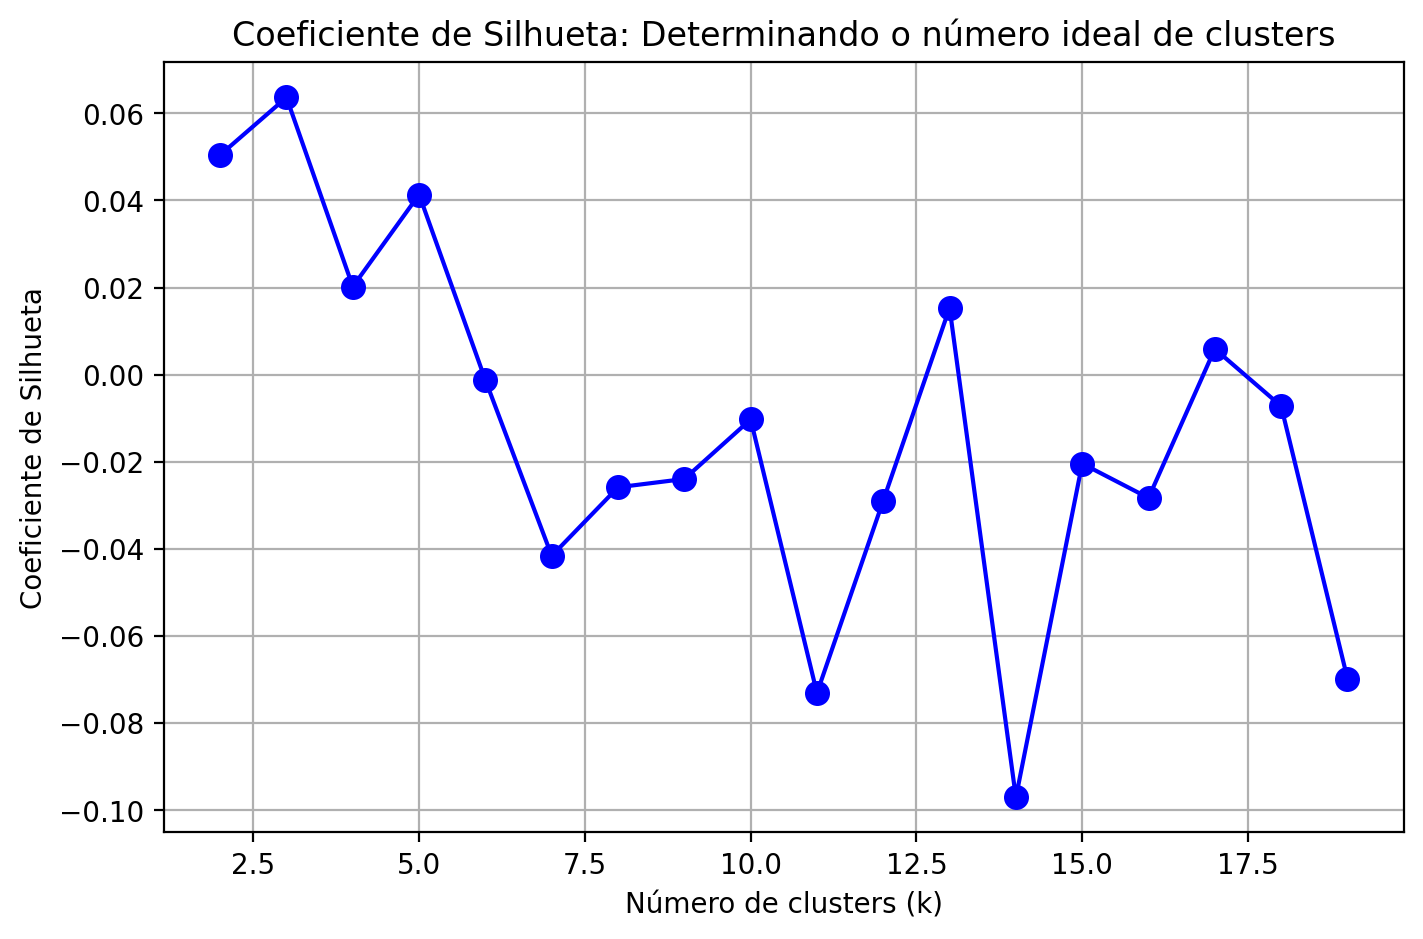

,Number_of_cars,Number_of_different_loads,num_wheels1,length1,shape1,num_loads1,load_shape1,num_wheels2,length2,shape2,...,Triangle_next_to_hexagon,Triangle_next_to_circle,Hexagon_next_to_hexagon,Hexagon_next_to_circle,Circle_next_to_circle,Class_attribute,Fuzzy_Cluster,Fuzzy_Cluster_0,Fuzzy_Cluster_1,Fuzzy_Cluster_2
0,4,3,2,2,2.0,3,NaN,2,1,9.0,...,0,0,0,0,0,0,1,0.333333,0.333334,0.333333
1,4,2,2,1,9.0,1,1.0,2,1,3.0,...,0,1,0,0,0,0,2,0.333333,0.333333,0.333334
2,4,3,2,1,2.0,1,1.0,2,1,9.0,...,0,0,0,0,0,0,1,0.333333,0.333333,0.333333
3,5,4,2,1,9.0,1,NaN,2,2,9.0,...,0,1,0,0,0,0,1,0.333333,0.333334,0.333333
4,4,3,2,1,15.0,1,NaN,2,1,3.0,...,0,0,0,0,0,0,2,0.333333,0.333333,0.333334


In [160]:
# Excluindo colunas irrelevantes
df_fuzzy = df_main.copy()
cols_to_exclude = [],
for col in cols_to_exclude:
    df_fuzzy.drop(col, axis=1, inplace=True)


# Seleção das features
X = df_fuzzy

# Convertendo todas as colunas para numérico e preenchendo valores inválidos com NaN
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Tratando valores ausentes
X = X.fillna(X.mean())

# Padronização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determinando o número de clusters ideal (usando coeficiente de silhueta)
silhouette_scores = []
K = range(2, 20)  # Testaremos de 2 a 10 clusters

for k in K:
    fcm = FCM(n_clusters=k, m=3, max_iter=1000, error=1e-2, random_state=1)
    fcm.fit(X_scaled)
    fuzzy_labels = fcm.predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, fuzzy_labels))

# Gráfico do coeficiente de silhueta
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'bo-', markersize=8)
plt.title('Coeficiente de Silhueta: Determinando o número ideal de clusters')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Coeficiente de Silhueta')
plt.grid(True)
plt.show()

# Escolhendo o número ideal de clusters com base no coeficiente de silhueta
k_optimal = 3

# Aplicando Fuzzy C-Means com o número ideal de clusters
fcm = FCM(n_clusters=k_optimal, random_state=42)
fcm.fit(X_scaled)

# Obtendo os centros dos clusters
centers = fcm.centers

# Obtendo os graus de pertencimento (fuzzy membership matrix)
membership_matrix = fcm.u

# Adicionando o cluster dominante ao DataFrame original
df_fuzzy['Fuzzy_Cluster'] = fcm.predict(X_scaled)
for i in range(k_optimal):
    df_fuzzy[f'Fuzzy_Cluster_{i}'] = membership_matrix[:, i]
# Exibindo os primeiros 5 resultados
df_fuzzy.head()


# **Redução de Dimensionalidade e Clusterização**

## **Objetivo**  
Reduzir a dimensionalidade dos dados utilizando **PCA** e aplicar o algoritmo **Fuzzy C-Means (FCM)** para agrupar os trens em clusters com base nas componentes principais.

---

## **Etapas**  
1. **Tratamento e Padronização dos Dados**:  
   - Colunas numéricas são selecionadas e valores ausentes preenchidos com a média.  
   - Os dados são padronizados utilizando o **StandardScaler**.  

2. **Redução com PCA**:  
   - Os dados são reduzidos para **3 componentes principais**.  
   - A variância explicada acumulada é visualizada em um gráfico.  

3. **Clusterização com FCM**:  
   - O **Fuzzy C-Means** agrupa os dados reduzidos em **3 clusters**.  
   - Cada ponto possui graus de pertencimento a múltiplos clusters.  

4. **Visualização 3D**:  
   - Os clusters são visualizados em um gráfico **3D** utilizando as 3 componentes principais.  
   - Cada cluster é identificado por uma cor distinta.  

---

## **Resultado**  
Os dados foram agrupados em **3 clusters** e visualizados no espaço tridimensional das componentes principais, facilitando a interpretação dos padrões.



In [161]:
X = df_fuzzy.select_dtypes(include=[float, int])
# del X['Fuzzy_Cluster']

# Tratando valores ausentes
X = X.fillna(X.mean())

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca_3d = PCA(n_components=3)

plotX = pd.DataFrame(np.array(X.sample(100)))

#Rename plotX's columns since it was briefly converted to an np.array above
plotX.columns = X.columns # X.loc[0 ,:]    # X.columns
PCs_3d = pd.DataFrame(pca_3d.fit_transform(plotX.drop(["Fuzzy_Cluster"], axis=1)))

# Reduzindo para 3 dimensões com PCA
X_pca = pca_3d.fit_transform(PCs_3d)

# Variância explicada por cada componente
explained_variance = pca_3d.explained_variance_ratio_

# Visualizar variância explicada acumulada
# plt.figure(figsize=(8, 5))
# plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
# plt.title('Variância Explicada Acumulada (PCA)')
# plt.xlabel('Número de Componentes')
# plt.ylabel('Variância Explicada Acumulada')
# plt.grid()
# plt.show()

# Aplicar Fuzzy C-Means no conjunto de dados reduzido
n_clusters = 3  # Escolha o número de clusters
fcm = FCM(n_clusters=n_clusters, random_state=42)
fcm.fit(X_pca)

# Previsões e graus de pertencimento
cluster_labels = fcm.predict(X_pca)

# Criando o DataFrame para visualização
df_plot = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_plot['Cluster'] = cluster_labels

# Definir cores para os clusters
colors = {0: '#355C7D', 1: '#F67280', 2: '#F8B195', 3: '#E84A5F', 4: '#4682B4', 5: '#74C476', 6: '#000000'}
df_plot['Color'] = df_plot['Cluster'].map(colors)

# Criar o gráfico 3D
fig = go.Figure()

# Adicionar os pontos ao gráfico
fig.add_trace(
    go.Scatter3d(
        x=df_plot['PC1'],
        y=df_plot['PC2'],
        z=df_plot['PC3'],
        mode='markers',
        marker=dict(size=5, color=df_plot['Color']),
        hovertemplate='<b>PC1:</b> %{x}<br>' +
                      '<b>PC2:</b> %{y}<br>' +
                      '<b>PC3:</b> %{z}<br>' +
                      '<b>Cluster:</b> %{marker.color}<extra></extra>'
    )
)

# Configuração do layout
fig.update_layout(
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(l=0, r=0, b=0, t=0),
    title="Clusters com Fuzzy C-Means (Usando PCA)"
)

# Exibir o gráfico
fig.show()

# Geração dos  Axíomas
Após a conclusão da clusterização dos dados dos trens, o próximo passo fundamental é a geração dos axiomas lógicos que capturam as relações e padrões identificados em cada cluster. Utilizando árvores de decisão, podemos extrair regras que associam atributos específicos dos trens às suas direções de movimento (leste ou oeste). Esses axiomas servem como fundamentos lógicos que serão integrados em modelos de aprendizado simbólico, como as Logical Tensor Networks (LTN), permitindo uma interpretação mais profunda e transparente dos fatores determinantes na classificação dos trens.

## Ferramentas Utilizadas
* Biblioteca dtreeviz: Utilizada para gerar visualizações gráficas das árvores de decisão, facilitando a interpretação das regras aprendidas.
* Pandas .describe(): Gerou tabelas com estatísticas descritivas para cada cluster, reforçando a análise e entendimento dos padrões presentes nos dados.

In [162]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib.font_manager")

clusters = df_fuzzy['Fuzzy_Cluster'].unique()
clusters

array([1, 2])

In [163]:
df_fuzzy

,Number_of_cars,Number_of_different_loads,num_wheels1,length1,shape1,num_loads1,load_shape1,num_wheels2,length2,shape2,...,Triangle_next_to_hexagon,Triangle_next_to_circle,Hexagon_next_to_hexagon,Hexagon_next_to_circle,Circle_next_to_circle,Class_attribute,Fuzzy_Cluster,Fuzzy_Cluster_0,Fuzzy_Cluster_1,Fuzzy_Cluster_2
0,4,3,2,2,2.0,3,NaN,2,1,9.0,...,0,0,0,0,0,0,1,0.333333,0.333334,0.333333
1,4,2,2,1,9.0,1,1.0,2,1,3.0,...,0,1,0,0,0,0,2,0.333333,0.333333,0.333334
2,4,3,2,1,2.0,1,1.0,2,1,9.0,...,0,0,0,0,0,0,1,0.333333,0.333333,0.333333
3,5,4,2,1,9.0,1,NaN,2,2,9.0,...,0,1,0,0,0,0,1,0.333333,0.333334,0.333333
4,4,3,2,1,15.0,1,NaN,2,1,3.0,...,0,0,0,0,0,0,2,0.333333,0.333333,0.333334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5,3,2,1,NaN,1,4.0,2,1,10.0,...,0,1,0,0,0,1,2,0.333333,0.333333,0.333333
96,3,2,2,2,NaN,3,NaN,2,1,7.0,...,0,0,0,0,0,1,2,0.333333,0.333333,0.333333
97,3,2,3,2,NaN,3,NaN,2,1,NaN,...,0,0,0,0,0,1,2,0.333333,0.333333,0.333333
98,3,1,2,1,9.0,1,4.0,2,1,NaN,...,0,0,0,0,0,1,2,0.333333,0.333333,0.333334


In [164]:
viz_array = []
data_frames = []
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
print(clusters)
for cluster in clusters:
    cluster_data = df_fuzzy[df_fuzzy['Fuzzy_Cluster'] == cluster]
    y_cluster = cluster_data['Class_attribute']
    X_cluster = cluster_data.drop(['Class_attribute','Fuzzy_Cluster', 'Fuzzy_Cluster_1', 'Fuzzy_Cluster_0', "Fuzzy_Cluster_2"], axis=1, errors='ignore')
    # Lidar com possíveis valores NaN
    X_cluster_no_nan = X_cluster.fillna(0)
    data_add = X_cluster_no_nan.copy()
    data_add['Class_attribute'] = y_cluster
    data_frames.append(data_add)
    # Treinar a árvore de decisão
    clf = DecisionTreeClassifier(max_depth=3, random_state=42)
    clf.fit(X_cluster_no_nan, y_cluster)
    # print(X_cluster_no_nan)
    # Visualizar a árvore com dtreeviz
    try:
        viz = dtreeviz.model(
            clf,
            X_cluster_no_nan,
            y_cluster,
            target_name="Direção",
            feature_names=X_cluster.columns,
            class_names=["Oeste", "Leste"]
        )
        # Salvar a visualização como arquivo PDF
        print("Entrei aqui")
        viz_array.append(viz)
        # viz.save(f"decision_tree_cluster_{cluster}.pdf")
        # print(f"Árvore de decisão para o Cluster {cluster} salva como 'decision_tree_cluster_{cluster}.pdf'")
        # Salvar a visualização como arquivo SVG
        # viz.view(fancy=False).save(f"decision_tree_cluster_{cluster}.svg")
        # print(f"Árvore de decisão para o Cluster {cluster} salva como 'decision_tree_cluster_{cluster}.svg'")
    except Exception as e:
        print(f"Erro ao visualizar a árvore para o Cluster {cluster}: {e}")


[1 2]
Entrei aqui
Entrei aqui


# Estatísticas dos clustes

In [165]:
# class_atribures = df_fuzzy['Class_attribute'].unique()

# for df in data_frames:
#   for class_attribute in class_atribures:
#     class_df = df[df['Class_attribute'] == class_attribute]
#     print("Classe:", class_attribute)
#     print(class_df.describe())

# Visualização das árvores

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



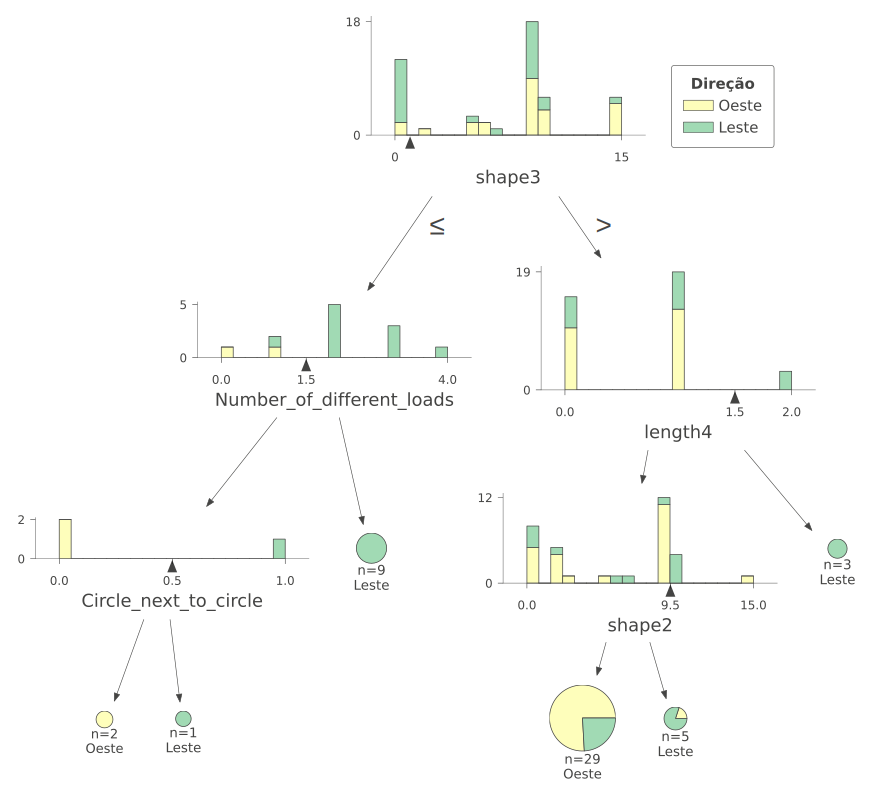

In [166]:
viz_array[0].view(scale=2.0)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



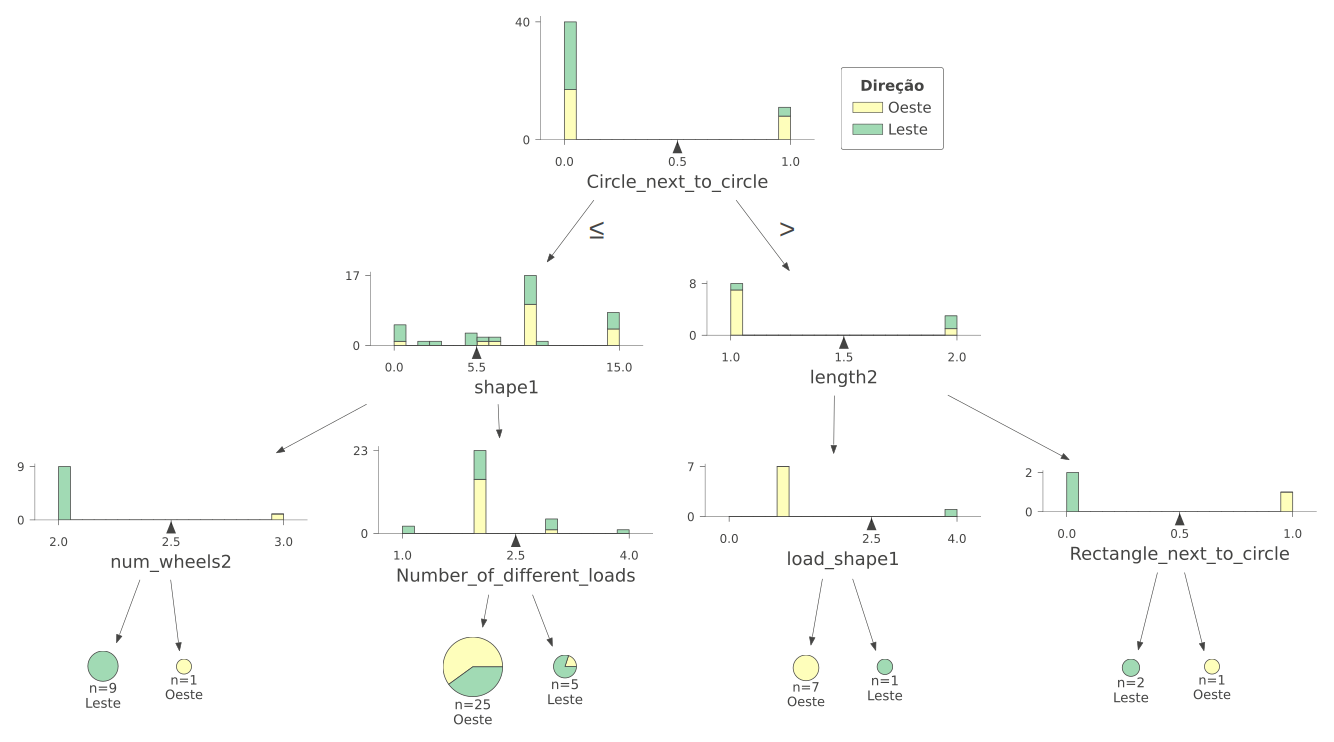

In [167]:
viz_array[1].view(scale=2.0)

In [168]:
!pip install -U dtreeviz


In [169]:
X_no_nan = X.fillna(X.mean())

In [170]:
X_no_nan

,Number_of_cars,Number_of_different_loads,num_wheels1,length1,shape1,num_loads1,load_shape1,num_wheels2,length2,shape2,...,Triangle_next_to_hexagon,Triangle_next_to_circle,Hexagon_next_to_hexagon,Hexagon_next_to_circle,Circle_next_to_circle,Class_attribute,Fuzzy_Cluster,Fuzzy_Cluster_0,Fuzzy_Cluster_1,Fuzzy_Cluster_2
0,4,3,2,2,2.0,3,2.451613,2,1,9.000000,...,0,0,0,0,0,0,1,0.333333,0.333334,0.333333
1,4,2,2,1,9.0,1,1.000000,2,1,3.000000,...,0,1,0,0,0,0,2,0.333333,0.333333,0.333334
2,4,3,2,1,2.0,1,1.000000,2,1,9.000000,...,0,0,0,0,0,0,1,0.333333,0.333333,0.333333
3,5,4,2,1,9.0,1,2.451613,2,2,9.000000,...,0,1,0,0,0,0,1,0.333333,0.333334,0.333333
4,4,3,2,1,15.0,1,2.451613,2,1,3.000000,...,0,0,0,0,0,0,2,0.333333,0.333333,0.333334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5,3,2,1,8.0,1,4.000000,2,1,10.000000,...,0,1,0,0,0,1,2,0.333333,0.333333,0.333333
96,3,2,2,2,8.0,3,2.451613,2,1,7.000000,...,0,0,0,0,0,1,2,0.333333,0.333333,0.333333
97,3,2,3,2,8.0,3,2.451613,2,1,8.038961,...,0,0,0,0,0,1,2,0.333333,0.333333,0.333333
98,3,1,2,1,9.0,1,4.000000,2,1,8.038961,...,0,0,0,0,0,1,2,0.333333,0.333333,0.333334


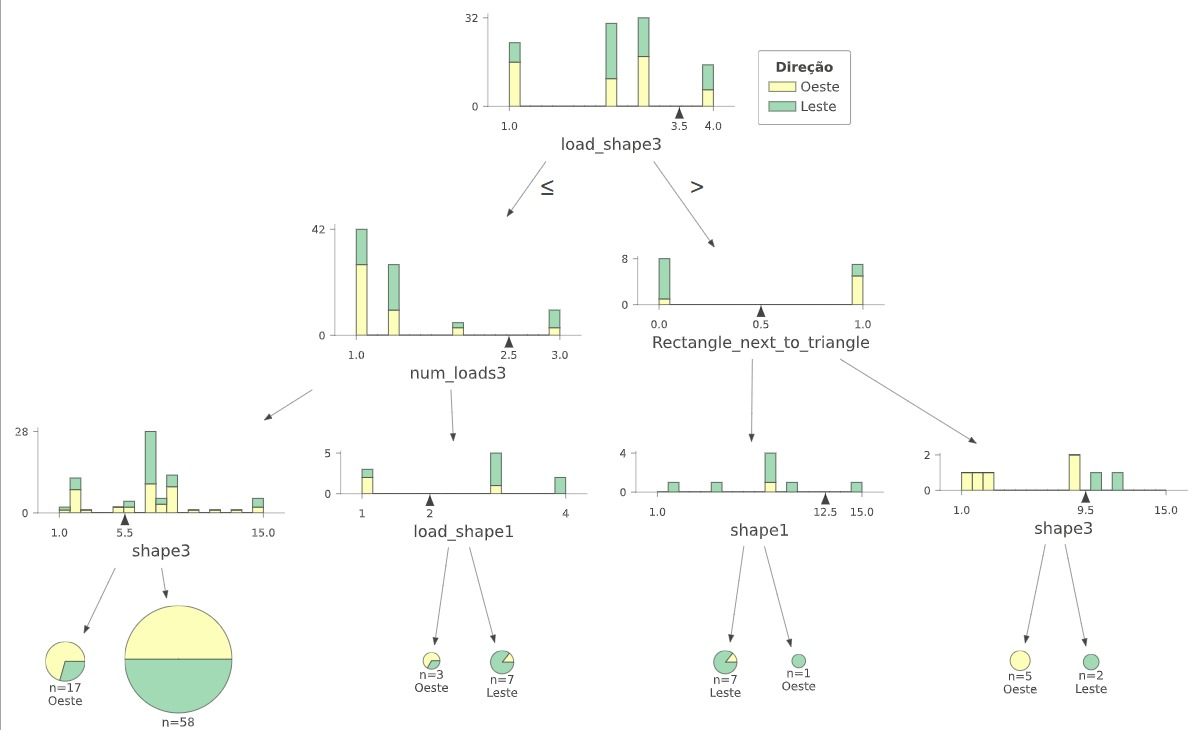

## **Conclusão**

Analisando os gráficos e as tabelas, foi possível extrair alguns **axiomas** que descrevem as relações e padrões observados nos dados dos trens. Esses axiomas são fundamentais para a classificação das direções de movimento (**leste** ou **oeste**) com base nas características dos vagões. A seguir, apresentamos os axiomas identificados:

1. $car(T, C)\land load\_shape3(T) \rightarrow east(T)$
2. $shape1 \leq 8 \land num\_loads2 > 0 \land shape3 \leq 8 \rightarrow Leste$ (no caso dos 10 trens)
3. $load\_shape3 = 4 \land \lnot Rectangle\_next\_to\_triangle \rightarrow Leste$ (no caso dos 10 trens)
4. $\lnot Rectangle\_next\_to\_triangle \land load\_shape3 = 0 \rightarrow Leste$ (no caso dos 10 trens)
5. $Rectangle\_next\_to\_triangle \land shape1 > 10 \rightarrow Oeste$ (no caso dos 10 trens)

### **Interpretação dos Axiomas**

1. **$load\_shape3 \geq 2 \rightarrow Leste$**
   - **Significado:** Se o atributo `load_shape3` de um trem for maior ou igual a 2, então o trem está se dirigindo para o **leste**.

2. **$shape1 \leq 8 \land num\_loads2 > 0 \land shape3 \leq 8 \rightarrow Leste$**
   - **Significado:** Se `shape1` for menor ou igual a 8, `num_loads2` for maior que 0 e `shape3` for menor ou igual a 8, então o trem está se dirigindo para o **leste**.

3. **$load\_shape3 = 4 \land \lnot Rectangle\_next\_to\_triangle \rightarrow Leste$**
   - **Significado:** Se `load_shape3` for igual a 4 e **não** houver a condição `Rectangle_next_to_triangle`, então o trem está se dirigindo para o **leste**.

4. **$\lnot Rectangle\_next\_to\_triangle \land load\_shape3 = 0 \rightarrow Leste$**
   - **Significado:** Se **não** houver a condição `Rectangle_next_to_triangle` e `load_shape3` for igual a 0, então o trem está se dirigindo para o **leste**.

5. **$Rectangle\_next\_to\_triangle \land shape1 > 10 \rightarrow Oeste$**
   - **Significado:** Se houver a condição `Rectangle_next_to_triangle` e `shape1` for maior que 10, então o trem está se dirigindo para o **oeste**.

### **Considerações Finais**

A extração desses axiomas permite a construção de um modelo de **Logical Tensor Networks (LTN)** mais robusto e interpretável, combinando técnicas de **aprendizado de máquina** com **conhecimento lógico** derivado dos dados. Esses axiomas servem como regras fundamentais que guiam a classificação dos trens, garantindo que as decisões do modelo sejam baseadas em critérios bem definidos e compreensíveis.

Além disso, a utilização de ferramentas como a **`dtreeviz`** para a visualização das árvores de decisão e o método **`.describe()`** do pandas para análise estatística reforça a validade das regras extraídas, proporcionando uma base sólida para o desenvolvimento e aprimoramento contínuo do modelo.

---


# **Questão 2**

A segunda etapa deste trabalho visa a implementação de uma solução utilizando a biblioteca LTNTorch se baseando nos Axiomas fornecidos na questão anterior pelo professor. O objetivo dos modelos que serão treinados nesta questão é o de classificar se os trens estão indo para leste ou para oeste. É necessário realizar, em primeiro lugar, a configuração do LTNTorch, que pode ser instalado por meio do comando:

`!pip install LTNtorch`

Uma vez que esta biblioteca principal está instalada, podemos prosseguir com a questão.

In [179]:
!pip install LTNtorch
import torch
import numpy as np
import pandas as pd
import ltn
import matplotlib.pyplot as plt

É necessário agora realizar a leitura do arquivo. É importante entender o que a questão pede. Ela pede para que a gente considere os axiomas da questão 1, que são:



1. num_cars(t, nc), em que t ∊ [1..10] e nc ∊ [3..5].
2. num_loads(t, nl) em que t ∊ [1..10] e nl ∊ [1..4].
3. num_wheels(t, c, w) em que t ∊ [1..10] e c ∊ [1..4] e w ∊ [2..3].
4. length(t, c, l) em que t ∊ [1..10] e c ∊ [1..4] e l ∊ [-1..1] (-1 denota curto e 1 longo)
5. shape(t, c, s) em que t ∊ [1..10] e c ∊ [1..4] e s ∊ [1..10] (um número para
cada forma).
6. num_cars_loads(t, c, ncl) em que t ∊ [1..10] e c ∊ [1..4] e ncl ∊ [0..3].
7. load_shape(t, c, ls) em que t ∊ [1..10] e c ∊ [1..4] e ls ∊ [1..4].
8. next_crc(t, c, x) em que t ∊ [1..10] e c ∊ [1..4] e x ∊ [-1..1], em que o vagão c do trem t tem um vagão adjacente com cargas em círculo.
9. next_hex(t, c, x) em que t ∊ [1..10] e c ∊ [1..4] e x ∊ [-1..1], em que o vagão c do trem t tem um vagão adjacente com cargas em hexágono.
10. next_rec(t, c, x) em que t ∊ [1..10] e c ∊ [1..4] e x ∊ [-1..1], em que o vagão c do trem t tem um vagão adjacente com cargas em retângulo.
11. next_tri(t, c, x) em que t ∊ [1..10] e c ∊ [1..4] e x ∊ [-1..1], em que o vagão c do trem t tem um vagão adjacente com cargas em triângulo


Com isso, temos o CSV tratado da forma mais adequada e buscando atender às regras impostas no trabalho.


-------------------- x -------------------


In [183]:
df100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_cars               100 non-null    int64  
 1   Number_of_different_loads    100 non-null    int64  
 2   num_wheels1                  100 non-null    int64  
 3   length1                      100 non-null    object 
 4   shape1                       100 non-null    object 
 5   num_loads1                   100 non-null    int64  
 6   load_shape1                  98 non-null     object 
 7   num_wheels2                  100 non-null    int64  
 8   length2                      100 non-null    object 
 9   shape2                       100 non-null    object 
 10  num_loads2                   97 non-null     float64
 11  load_shape2                  97 non-null     object 
 12  num_wheels3                  75 non-null     float64
 13  length3              


##  Tratamento de valores não numéricos
Para lidar com valores ausentes no conjunto de dados, foi implementada uma estratégia de imputação direcionada às variáveis categóricas. Inicialmente, definiu-se a função input_nan, que realiza a substituição de entradas ausentes (NaN) em colunas especificadas do DataFrame. A função itera sobre as colunas fornecidas e aplica o método fillna, substituindo os valores ausentes pelo valor imputado definido. Neste caso, o valor utilizado para imputação foi a string vazia (""), assegurando que as variáveis categóricas não contenham valores nulos. A seleção das colunas categóricas foi realizada com base em um padrão estrutural no nome das variáveis, organizadas em grupos relacionados às características length, shape e load_shape para quatro índices consecutivos (de 1 a 4). Por fim, a função foi aplicada ao DataFrame df100, garantindo a consistência das variáveis categóricas e preparando os dados para etapas subsequentes de análise ou modelagem.


In [184]:
# Nan treatment
def input_nan(df, columns, value):
  for col in columns:
    df[col] = df[col].fillna(value)
  return df

categorical_columns = [[f'length{i}', f'shape{i}', f'load_shape{i}'] for i in range(1, 5)]
categorical_columns = [item for sublist in categorical_columns for item in sublist]
input_value = ""
df100 = input_nan(df100, categorical_columns, input_value)

Para tratar valores ausentes em variáveis numéricas do conjunto de dados, foi aplicada uma estratégia de imputação semelhante à utilizada para as variáveis categóricas. Primeiramente, as variáveis numéricas foram selecionadas com base em um padrão estrutural em seus nomes, organizadas nos grupos `num_wheels` e `num_loads`, para índices consecutivos de 1 a 4. A lista resultante foi estruturada como um conjunto único de colunas. Em seguida, foi utilizada a função `input_nan`, que substitui valores ausentes (NaN) nas colunas especificadas do DataFrame por um valor numérico predefinido, neste caso, zero (`0`). Por fim, a função foi aplicada ao DataFrame `df100`, garantindo que todas as variáveis numéricas relevantes estejam livres de valores nulos e preparadas para etapas subsequentes de análise ou modelagem.

In [185]:
numerical_columns = [[f'num_wheels{i}', f'num_loads{i}'] for i in range(1, 5)]
numerical_columns = [item for sublist in numerical_columns for item in sublist]
input_value = 0
df100 = input_nan(df100, numerical_columns, input_value)

Aqui podemos observar, na 'INFO' abaixo, que não existem mais valores faltantes no conjunto de dados, já que o Non-Null Count de todas as colunas é igual a 100. As colunas numéricas incluem informações como o número de rodas e cargas, enquanto as colunas categóricas descrevem atributos de forma, comprimento e relações entre as formas dos trens.

In [186]:
df100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_cars               100 non-null    int64  
 1   Number_of_different_loads    100 non-null    int64  
 2   num_wheels1                  100 non-null    int64  
 3   length1                      100 non-null    object 
 4   shape1                       100 non-null    object 
 5   num_loads1                   100 non-null    int64  
 6   load_shape1                  100 non-null    object 
 7   num_wheels2                  100 non-null    int64  
 8   length2                      100 non-null    object 
 9   shape2                       100 non-null    object 
 10  num_loads2                   100 non-null    float64
 11  load_shape2                  100 non-null    object 
 12  num_wheels3                  100 non-null    float64
 13  length3              

As colunas load_shape1, load_shape2, load_shape3 e load_shape4 contêm categorias distintas relacionadas às formas das cargas nos trens. Os valores únicos incluem formas como rectanglod (em variações de tamanho: short, medium e long), circlelod, trianglod, hexaglod, diamondlod, invtrianglod e upsidedowntri. É possível notar que há algumas entradas vazias (" ") em todas as colunas, sugerindo que algumas cargas não têm uma forma definida. A distribuição das formas é semelhante entre as colunas, com algumas variações específicas, como a inclusão de diamondlod nas colunas load_shape2, load_shape3 e load_shape4.

In [187]:
df100.load_shape1.unique(), df100.load_shape2.unique(), df100.load_shape3.unique(), df100.load_shape4.unique()

(array(['rectanglod(short)', 'circlelod', 'rectanglod(medium)',
        'rectanglod(long)', 'trianglod', 'invtrianglod', 'hexaglod', '',
        'upsidedowntri'], dtype=object),
 array(['trianglod', 'rectanglod(medium)', 'rectanglod(short)',
        'circlelod', 'rectanglod(long)', 'diamondlod', 'invtrianglod',
        'hexaglod', '', 'rectanglod'], dtype=object),
 array(['rectanglod(long)', 'circlelod', 'trianglod', 'rectanglod(medium)',
        '', 'rectanglod(short)', 'invtrianglod', 'hexaglod', 'diamondlod'],
       dtype=object),
 array(['', 'circlelod', 'trianglod', 'rectanglod(medium)',
        'rectanglod(long)', 'diamondlod', 'rectanglod(short)'],
       dtype=object))



Para que tenhamos um conjunto de dados onde cada linha representa um vagão individual de um trem, em vez de representar o trem como um todo. Essa transformação organiza os dados em um formato mais SEGREGADA, incluindo atributos do vagão e suas RELAÇÕES com outros vagões.


Deste modo, temos:

1. Iterações por trêns e vagões: fazemos as seguintes etapas:

  1.1. Para cada trem no DataFrame original, percorre-se cada vagão (excluindo a locomotiva) com base no número total de vagões (Number_of_cars).


2. Extração de informações do vagão:

  2.1. Atributos como o número de rodas (num_wheels), comprimento (length), forma (shape), número de cargas (num_loads), e formato das cargas (load_shape) são extraídos.


3. Cálculo das relações entre formas:

  3.1. Dependendo da forma do vagão (shape), são identificadas as relações com a forma de vagões adjacentes, como Circle_next_to_circle ou Rectangle_next_to_triangle.

4. Criação de um novo DataFrame:

  4.1. Cada linha do novo DataFrame (transformed_df) contém informações detalhadas do vagão, como o número do trem, o número do vagão, suas características físicas, e a direção do trem (Class_attribute).
  O resultado é um DataFrame onde cada linha corresponde a um vagão individual, estruturado para facilitar análises específicas por vagão e suas relações.

In [188]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

def transform_dataframe(df):
    # List to hold the new rows
    transformed_rows = []

    for idx, row in df.iterrows():
        train_number = idx
        num_cars = row["Number_of_cars"]
        num_loads = row["Number_of_different_loads"]
        direction = row["Class_attribute"]
        # Iterate through each car in the train
        for i in range(1, num_cars): # num_cars counts the train head itself, which is not used for any features.
            car_number = i
            num_wheels = row[f"num_wheels{i}"]
            length = row[f"length{i}"]
            shape = row[f"shape{i}"]
            num_loads_i = row[f"num_loads{i}"]
            load_shape = row[f"load_shape{i}"]

            # Determine the next shape values based on current shape
            match shape:
              case _ if "circle" in shape:
                  next_crc = row["Circle_next_to_circle"]
                  next_hex = 0
                  next_rec = 0
                  next_tri = 0
              case _ if "rect" in shape:
                  next_crc = row["Rectangle_next_to_circle"]
                  next_hex = row["Rectangle_next_to_hexagon"]
                  next_rec = row["Rectangle_next_to_rectangle"]
                  next_tri = row["Rectangle_next_to_triangle"]
              case _ if "tri" in shape:
                   next_crc = row["Triangle_next_to_circle"]
                   next_hex = row["Triangle_next_to_hexagon"]
                   next_rec = 0
                   next_tri = row["Triangle_next_to_triangle"]
              case _ if "hex" in shape:
                  next_crc = row["Hexagon_next_to_circle"]
                  next_hex = row["Hexagon_next_to_hexagon"]
                  next_rec = 0
                  next_tri = 0
              case _:
                  next_crc = 0
                  next_hex = 0
                  next_rec = 0
                  next_tri = 0

            # Append the new row
            transformed_rows.append({
                "train_number": train_number,
                "num_cars": num_cars,
                "num_loads": num_loads,
                "num_wheels": num_wheels,
                "car_number": car_number,
                "length": length,
                "shape": shape,
                "num_cars_loads": num_loads_i,
                "load_shape": load_shape,
                "next_crc": next_crc,
                "next_hex": next_hex,
                "next_rec": next_rec,
                "next_tri": next_tri,
                "direction": direction
            })

    # Create a new DataFrame from the transformed rows
    transformed_df = pd.DataFrame(transformed_rows)
    return transformed_df

# Example usage
transformed_df = transform_dataframe(df100)
# transformed_df_10 = transform_dataframe(df10)

Aqui, como visto na disciplina, está sendo utilizado tantoaprendizado de máquina quanto raciocínio lógico utilizando a abordagem Logical Tensor Networks (LTN). Vamos agora tentar gerar o modelo baseado em redes neurais para que ele não apenas faça previsões, mas também respeite regras lógicas previamente definidas, aumentando a capacidade de interpretação do nosso programa.

Com isso foram definidas as constantes l_W e l_E, representando as classes "West" e "East", que servem como referência para o treinamento supervisionado. Em seguida, foi implementado um modelo MLP (Multi-Layer Perceptron) responsável por calcular os logits (valores não normalizados) das classes a partir das entradas, sem aplicar diretamente a função softmax. A separação entre logits e probabilidades foi necessária para permitir o cálculo explícito da satisfação lógica em etapas posteriores.

Com base no MLP, foi desenvolvido o modelo EastModel, que combinou as saídas intermediárias de diferentes predições, utilizando uma camada de agregação neural para convergir os logits em uma representação final. Para conectar os resultados do modelo ao raciocínio lógico, foi implementada a classe LogitsToPredicate, que converteu as probabilidades em predicados lógicos ponderados pelas etiquetas de classe. Por fim, foram definidos o quantificador lógico Forall e o operador de agregação SatAgg, responsáveis por calcular os níveis de satisfação lógica no contexto das predições. Essa estrutura permitiu que o treinamento do modelo fosse orientado não apenas pelos dados, mas também por regras lógicas, criando um sistema mais robusto e interpretável.

In [189]:
import ltn

# we define the constants
l_W = ltn.Constant(torch.tensor([1, 0]))
l_E = ltn.Constant(torch.tensor([0, 1]))

# we define predicate P
class MLP(torch.nn.Module):
    """
    This model returns the logits for the classes given an input example. It does not compute the softmax, so the output
    are not normalized.
    This is done to separate the accuracy computation from the satisfaction level computation. Go through the example
    to understand it.
    """
    def __init__(self, layer_sizes=(16, 64, 32, 8, 2)):
        super(MLP, self).__init__()
        self.elu = torch.nn.ELU()
        self.dropout = torch.nn.Dropout(0.5)
        self.linear_layers = torch.nn.ModuleList([torch.nn.Linear(layer_sizes[i - 1], layer_sizes[i])
                                                  for i in range(1, len(layer_sizes))])

    def forward(self, x, training=False):
        """
        Method which defines the forward phase of the neural network for our multi class classification task.
        In particular, it returns the logits for the classes given an input example.

        :param x: the features of the example
        :param training: whether the network is in training mode (dropout applied) or validation mode (dropout not applied)
        :return: logits for example x
        """
        for layer in self.linear_layers[:-1]:
            x = self.elu(layer(x))
            if training:
                x = self.dropout(x)
        logits = self.linear_layers[-1](x)
        return logits


class EastModel(torch.nn.Module):
    """
    This model has inside a logits model, that is a model which compute logits for the classes given an input example x.
    The idea of this model is to keep logits and probabilities separated. The logits model returns the logits for an example,
    while this model returns the probabilities given the logits model.

    In particular, it takes as input an example x and a class label l. It applies the logits model to x to get the logits.
    Then, it applies a softmax function to get the probabilities per classes. Finally, it returns only the probability related
    to the given class l.
    """
    def __init__(self, logits_model_map, indexer):
        super(EastModel, self).__init__()
        self.logits_model_map = logits_model_map
        self.softmax = torch.nn.Softmax(dim=1)
        self.intermediate_logits = {}

        self.elu = torch.nn.ELU()
        self.dropout = torch.nn.Dropout(0.5)
        self.aggregatorNN = torch.nn.ModuleList([torch.nn.Linear(22, 12), torch.nn.Linear(12, 2)])
        self.model_indexing = indexer

    def forward(self, x, training=False):
        # print(x.shape)
        for pred in self.model_indexing.keys():
          self.intermediate_logits[pred] = self.logits_model_map[pred](x[:, self.model_indexing[pred]], training=training)

        # for i in self.intermediate_logits.keys():
        #   print(i, self.intermediate_logits[i].shape)

        logits = torch.cat(list([self.intermediate_logits[key] for key in self.intermediate_logits.keys()]), dim=1) #probability to go west
        # I want to create a MLP layer to converge the logits from each predicate into a final one.
        # print("Logits shape", logits.shape)
        for layer in self.aggregatorNN[:-1]:
            logits = self.elu(layer(logits))
            if training:
                logits = self.dropout(logits)
        logits = self.aggregatorNN[-1](logits)
        return logits
class LogitsToPredicate(torch.nn.Module):
    def __init__(self, logits_model):
        super(LogitsToPredicate, self).__init__()
        self.logits_model = logits_model
        self.softmax = torch.nn.Softmax(dim=1)

    def forward(self, x, l, training=False):
        logits = self.logits_model(x, training=training)
        probs = self.softmax(logits)
        out = torch.sum(probs * l, dim=1)
        return out



# we define the connectives, quantifiers, and the SatAgg
Forall = ltn.Quantifier(ltn.fuzzy_ops.AggregPMeanError(p=2), quantifier="f")
SatAgg = ltn.fuzzy_ops.SatAgg()

Aqui nesta classe - DataLoader - vamos organizar os dados em batches balanceados, estruturando as features em um formato pronto para o treinamento ou a avaliação do modelo. Em seguida, temos a função compute_sat_level calcula o nível médio de satisfação lógica, permitindo avaliar o alinhamento do modelo treinado com as regras lógicas definidas. Esse processo integra aprendizado supervisionado e lógica simbólica, fornecendo uma métrica adicional além da acurácia.

In [190]:
## Define metric functions
from sklearn.metrics import accuracy_score
import numpy as np

class DataLoader(object):
    def __init__(self,
                 data,
                 labels,
                 batch_size=1,
                 shuffle=True):
        self.data = data
        self.labels = labels
        self.batch_size = batch_size
        self.shuffle = shuffle

    def __len__(self):
        return int(np.ceil(self.data.shape[0] / self.batch_size))

    def __iter__(self):
        class_0_idx = np.where(self.labels == 0)[0]
        class_1_idx = np.where(self.labels == 1)[0]

        if self.shuffle:
            np.random.shuffle(class_0_idx)
            np.random.shuffle(class_1_idx)

        n = min(len(class_0_idx), len(class_1_idx))
        batch_half_size = self.batch_size // 2

        for i in range(0, n, batch_half_size):
            end_idx = min(i + batch_half_size, n)
            idx0 = class_0_idx[i:end_idx]
            idx1 = class_1_idx[i:end_idx]

            batch_idx = np.concatenate((idx0, idx1))
            if self.shuffle:
                np.random.shuffle(batch_idx)
            selected_data = self.data.iloc[batch_idx]
            selected_labels = self.labels.iloc[batch_idx]

            base_columns = ['train_number', 'num_cars']

            length_columns = [col for col in selected_data.columns if col.startswith('length_')]
            shape_columns = [col for col in selected_data.columns if col.startswith('shape_')]
            load_shape_columns = [col for col in selected_data.columns if col.startswith('load_shape_')]

            inputs = []
            inputs.append(selected_data[['train_number','num_cars']].values)
            inputs.append(selected_data[['train_number','num_loads']].values)
            inputs.append(selected_data[['train_number', 'car_number', 'num_wheels']].values)
            inputs.append(selected_data[base_columns + length_columns].values)
            inputs.append(selected_data[base_columns + shape_columns].values)
            inputs.append(selected_data[['train_number', 'car_number', 'num_cars_loads']].values)
            inputs.append(selected_data[base_columns + load_shape_columns].values)
            inputs.append(selected_data[['train_number', 'car_number', 'next_crc']].values)
            inputs.append(selected_data[['train_number', 'car_number', 'next_hex']].values)
            inputs.append(selected_data[['train_number', 'car_number', 'next_rec']].values)
            inputs.append(selected_data[['train_number', 'car_number', 'next_tri']].values)
            stack_inputs = np.hstack(inputs)
            torch_inputs = torch.tensor(stack_inputs, dtype=torch.float32)
            selected_labels = torch.tensor(selected_labels.values, dtype=torch.float32)
            yield torch_inputs, selected_labels


def compute_sat_level(loader):
    mean_sat = 0
    for data, labels in loader:
        x_W = ltn.Variable("x_W", data[labels == 0])
        x_E = ltn.Variable("x_E", data[labels == 1])
        mean_sat += SatAgg(
            Forall(x_W, P(x_W, l_W)),
            Forall(x_E, P(x_E, l_E)),
        )
    mean_sat /= len(loader)
    return mean_sat

## A) Treinamento do Modelo

Agora realizaremos o treino do modelo com 100 trens utilizando o que foi fornecido na questão: 70-30 -> 70% para treino e 30% para teste, dividindo entre oeste e lest. Vamos usar o O GroupShuffleSplit que é uma estratégia de divisão que considera grupos para garantir que os dados de um mesmo grupo não apareçam em ambos os conjuntos (treino e teste).


em




```
train_loader = DataLoader(X_train, y_train, 64, shuffle=True) # organizando 50% e 50%
test_loader = DataLoader(X_test, y_test, 64, shuffle=False)
```

nós fazemos a divisão por igual de 50% para oeste e 50% para leste.





In [191]:
from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder

categorical_columns = ['shape', 'length', 'load_shape']
numerical_columns = ['train_number', 'num_cars', 'num_loads', 'num_wheels', 'car_number', 'num_cars_loads']

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_categorical = encoder.fit_transform(transformed_df[categorical_columns])
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))

scaler = MinMaxScaler()
scaled_numerical = scaler.fit_transform(transformed_df[numerical_columns])
scaled_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

df_processed = pd.concat([transformed_df.drop(columns=categorical_columns + numerical_columns), scaled_df, encoded_df], axis=1)

label_encoder = LabelEncoder()
df_processed['direction'] = label_encoder.fit_transform(df_processed['direction'])

X = df_processed.drop(columns=['direction'])
y = df_processed['direction']

gss = GroupShuffleSplit(n_splits=1, test_size=0.3, random_state=33)

#30% para teste, o que indica que o restante será pa ra treinamento.

train_idx, test_idx = next(gss.split(X, y, groups=transformed_df['train_number']))

# Splitting the data
X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
train_loader = DataLoader(X_train, y_train, 64, shuffle=True) # organizando 50% e 50%
test_loader = DataLoader(X_test, y_test, 64, shuffle=False)



In [192]:
pred_map = {
    "num_cars": MLP(layer_sizes=(2, 8, 8, 2)),
    "num_loads": MLP(layer_sizes=(2, 8, 8, 2)),
    "num_wheels": MLP(layer_sizes=(3, 8, 8, 2)),
    "length": MLP(layer_sizes=(4, 8, 8, 2)),
    "shape": MLP(layer_sizes=(22, 16, 8, 2)),
    "num_cars_loads": MLP(layer_sizes=(3, 8, 8, 2)),
    "load_shape": MLP(layer_sizes=(12, 16, 8, 2)),
    "next_crc": MLP(layer_sizes=(3, 8, 8, 2)),
    "next_hex": MLP(layer_sizes=(3, 8, 8, 2)),
    "next_rec": MLP(layer_sizes=(3, 8, 8, 2)),
    "next_tri": MLP(layer_sizes=(3, 8, 8, 2))
}
indexer = {
            "num_cars": list(range(0, 2)),
            "num_loads": list(range(2, 4)),
            "num_wheels": list(range(4, 7)),
            "length": list(range(7, 11)),
            "shape": list(range(11, 33)),
            "num_cars_loads": list(range(33, 36)),
            "load_shape": list(range(36, 48)),
            "next_crc": list(range(48, 51)),
            "next_hex": list(range(51, 54)),
            "next_rec": list(range(54, 57)),
            "next_tri": list(range(57, 60))
        }
east = EastModel(pred_map, indexer)
P = ltn.Predicate(LogitsToPredicate(east))

O gráfico está verificando se os train_numbers (identificadores dos trens) foram corretamente separados entre os conjuntos de treino e teste após a divisão dos dados.

As barras azuis estão representando os trens no conjunto de treino.
As barras vermelhas estão representando os trens no conjunto de teste.
Caso algum train_number esteja presente em ambos os conjuntos, ele será destacado com uma barra verde, indicando sobreposição.

No nosso caso podemos ver que não há sobreposição!!!

No train_number appears in both train and test sets.


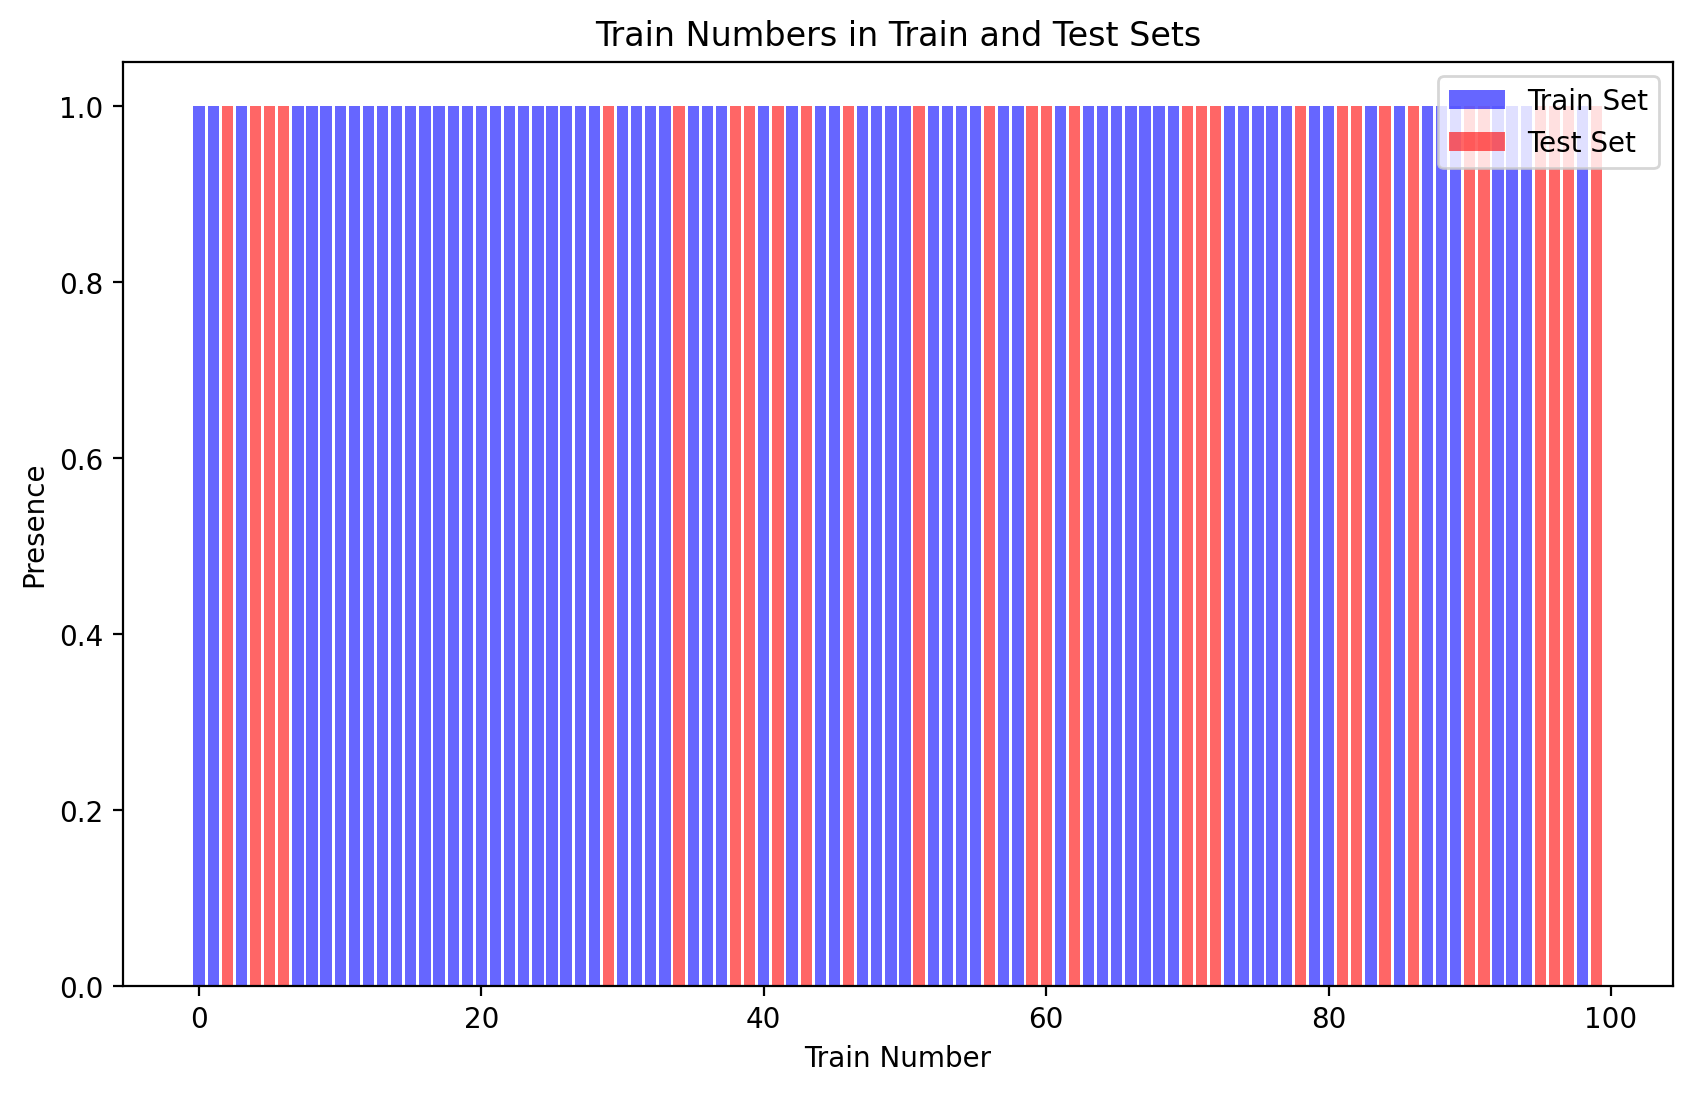

In [193]:
import matplotlib.pyplot as plt

train_numbers_train = transformed_df.iloc[train_idx]['train_number'].unique()
train_numbers_test = transformed_df.iloc[test_idx]['train_number'].unique()

intersection = set(train_numbers_train).intersection(set(train_numbers_test))

plt.figure(figsize=(10, 6))

plt.bar(train_numbers_train, [1] * len(train_numbers_train), color='blue', alpha=0.6, label='Train Set')
plt.bar(train_numbers_test, [1] * len(train_numbers_test), color='red', alpha=0.6, label='Test Set')

plt.xlabel('Train Number')
plt.ylabel('Presence')
plt.title('Train Numbers in Train and Test Sets')
plt.legend()

if intersection:
    print("WARNING: The following train_numbers are in both subsets:", intersection)
    for train_number in intersection:
        plt.bar(train_number, 1, color='green', alpha=1, label='Intersection')
else:
    print("No train_number appears in both train and test sets.")

plt.show()

O treinamento foi feito utilizando o otimizador Adam já que é um problema mais simples e estamos buscando uma alta eficiencia e rapidez para que ele consiga convergir o mais rápido sem sofrer overfeet.

In [194]:
for data, labels in train_loader:
    print(data.shape)
    break

torch.Size([64, 60])


In [195]:

## Model Training
optimizer = torch.optim.Adam(P.parameters(), lr=0.0001)
def compute_accuracy(loader):
    mean_accuracy = 0.0
    for data, labels in loader:
        predictions = east(data).detach().cpu().numpy()  # Convert to NumPy array on CPU
        predictions = np.argmax(predictions, axis=1)
        labels = labels.cpu().numpy()                    # Convert to NumPy array on CPU
        mean_accuracy += accuracy_score(labels, predictions)

    return mean_accuracy / len(loader)

for epoch in range(1000):
    train_loss = 0.0
    for batch_idx, (data, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        x_W = ltn.Variable("x_W", data[labels == 0]) # West samples
        x_E = ltn.Variable("x_E", data[labels == 1]) # East samples
        sat_agg = SatAgg(
            Forall(x_W, P(x_W, l_W, training=True)),
            Forall(x_E, P(x_E, l_E, training=True)),
        )
        loss = 1. - sat_agg
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss = train_loss / len(train_loader)

    # we print metrics every 20 epochs of training
    if epoch % 20 == 0:
        print(" epoch %d | loss %.4f | Train Sat %.3f | Test Sat %.3f | Train Acc %.3f | Test Acc %.3f"
              %(epoch, train_loss, compute_sat_level(train_loader), compute_sat_level(test_loader),
                    compute_accuracy(train_loader), compute_accuracy(test_loader)))

 epoch 0 | loss 0.5120 | Train Sat 0.489 | Test Sat 0.489 | Train Acc 0.500 | Test Acc 0.500
 epoch 20 | loss 0.5113 | Train Sat 0.492 | Test Sat 0.492 | Train Acc 0.500 | Test Acc 0.500
 epoch 40 | loss 0.5076 | Train Sat 0.495 | Test Sat 0.494 | Train Acc 0.500 | Test Acc 0.500
 epoch 60 | loss 0.5070 | Train Sat 0.496 | Test Sat 0.496 | Train Acc 0.500 | Test Acc 0.500
 epoch 80 | loss 0.5140 | Train Sat 0.497 | Test Sat 0.497 | Train Acc 0.500 | Test Acc 0.500
 epoch 100 | loss 0.5094 | Train Sat 0.499 | Test Sat 0.498 | Train Acc 0.500 | Test Acc 0.500
 epoch 120 | loss 0.4981 | Train Sat 0.499 | Test Sat 0.499 | Train Acc 0.500 | Test Acc 0.500
 epoch 140 | loss 0.4868 | Train Sat 0.500 | Test Sat 0.499 | Train Acc 0.500 | Test Acc 0.500
 epoch 160 | loss 0.5018 | Train Sat 0.500 | Test Sat 0.500 | Train Acc 0.500 | Test Acc 0.500
 epoch 180 | loss 0.4974 | Train Sat 0.500 | Test Sat 0.500 | Train Acc 0.500 | Test Acc 0.500
 epoch 200 | loss 0.4983 | Train Sat 0.500 | Test Sat 0.

In [196]:
all_loader = DataLoader(X, y, 64, shuffle=False)
compute_accuracy(all_loader)
for data, labels in all_loader:
    predictions = east(data).detach().numpy()
    predictions = np.argmax(predictions, axis=1)
    print(predictions, labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1] tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1] tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] tensor([0., 0., 0., 0., 0., 0

Acurácia: 0.625
Precisão: 0.604
Recall: 0.724
F1-Score: 0.659


<Figure size 800x600 with 0 Axes>

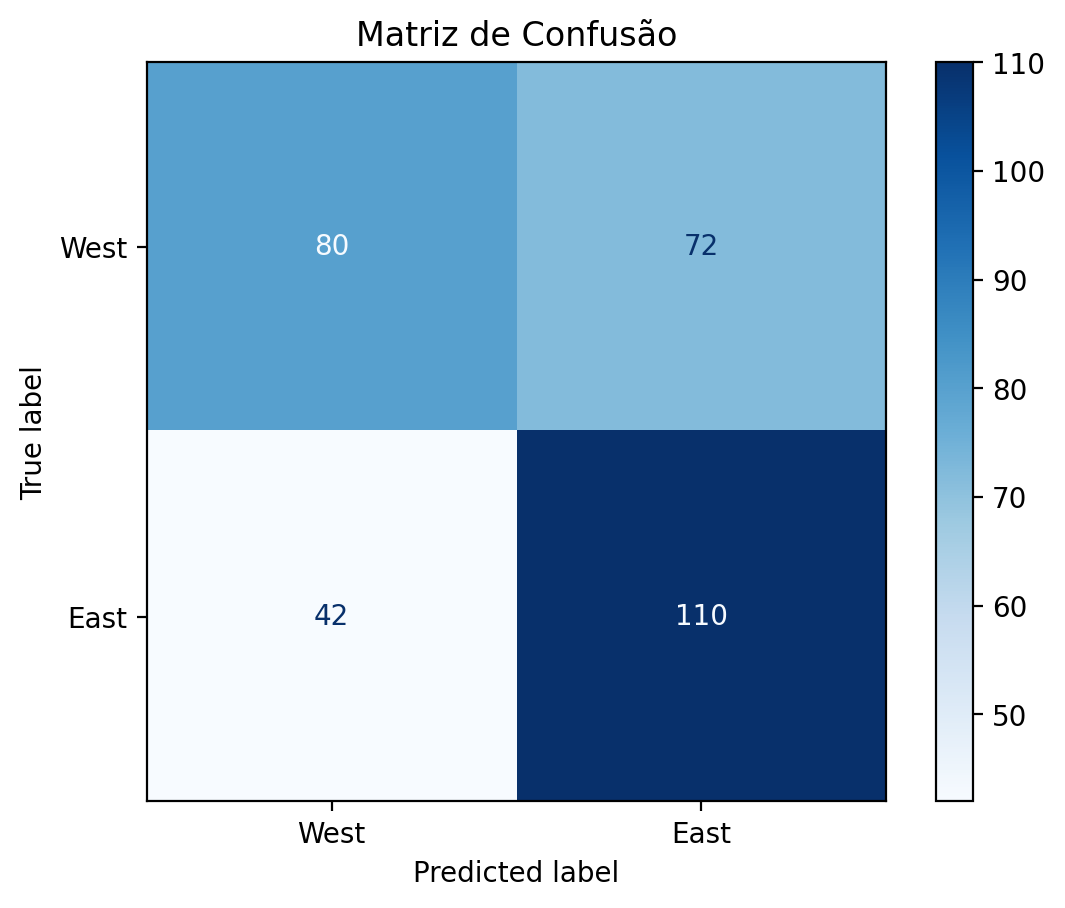

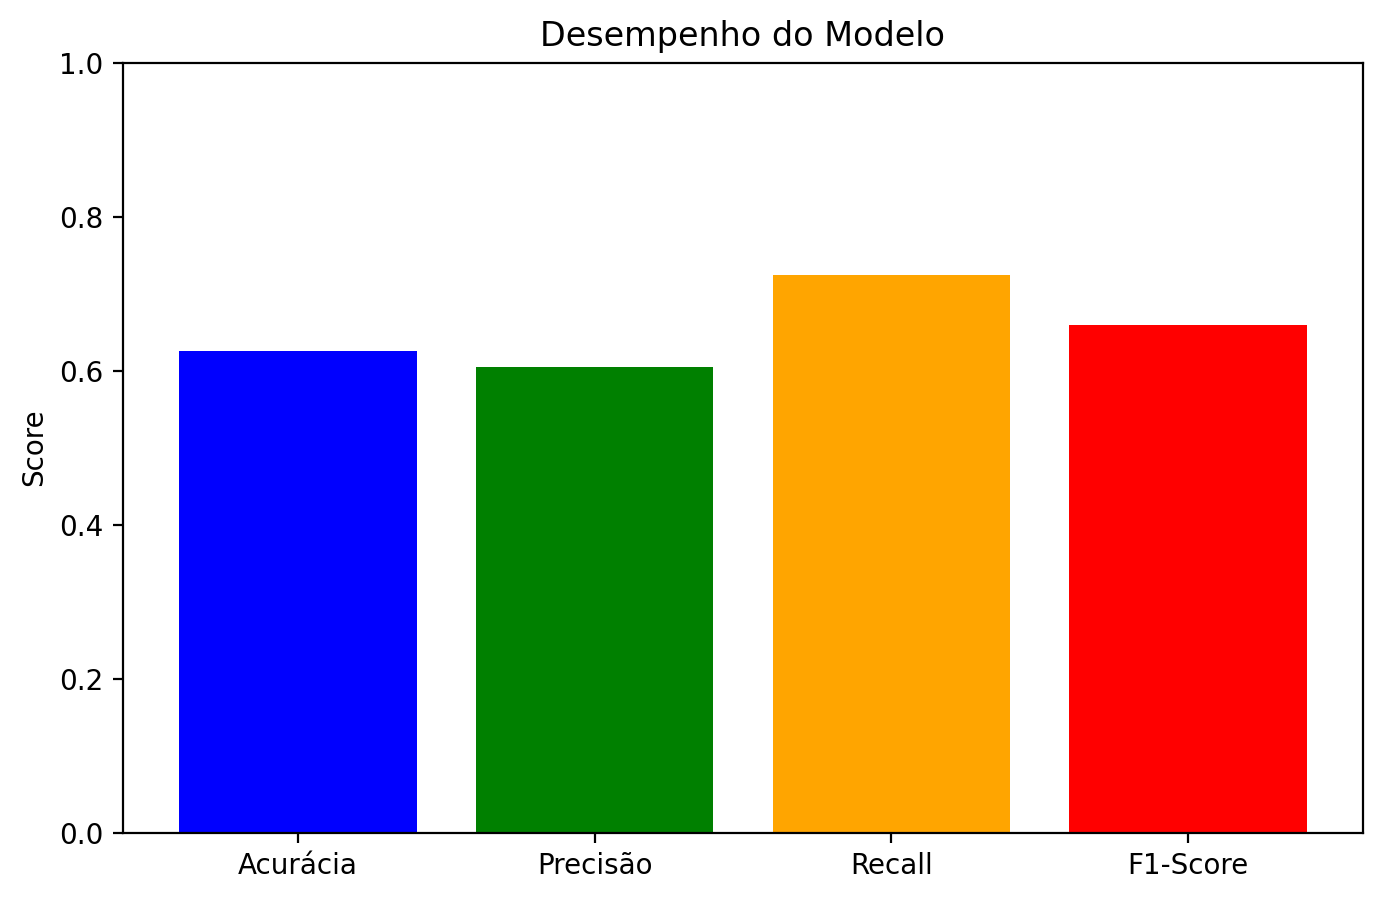

In [197]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Inicializando o DataLoader sem shuffle
all_loader = DataLoader(X, y, 64, shuffle=False)

# Inicializando listas para armazenar os resultados
all_true_labels = []
all_predictions = []

# Loop para obter as previsões e os rótulos verdadeiros
for data, labels in all_loader:
    predictions = east(data).detach().numpy()
    predictions = np.argmax(predictions, axis=1)
    all_true_labels.extend(labels.numpy())
    all_predictions.extend(predictions)

# Cálculo das métricas
accuracy = accuracy_score(all_true_labels, all_predictions)
precision = precision_score(all_true_labels, all_predictions, average='binary')
recall = recall_score(all_true_labels, all_predictions, average='binary')
f1 = f1_score(all_true_labels, all_predictions, average='binary')

# Exibindo as métricas
print(f"Acurácia: {accuracy:.3f}")
print(f"Precisão: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")

# Plotando a matriz de confusão
cm = confusion_matrix(all_true_labels, all_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["West", "East"])

plt.figure(figsize=(8, 6))
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusão")
plt.show()

# Plotando as métricas como gráfico de barras
metrics = {"Acurácia": accuracy, "Precisão": precision, "Recall": recall, "F1-Score": f1}

plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'orange', 'red'])
plt.title("Desempenho do Modelo")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.show()


## B) Comparando resultados com do Garcez

Ao compararmos os resultados obtidos pelo nosso modelo com os apresentados por Garcez, é possível observar diferenças significativas em termos de desempenho. Nosso modelo apresentou os seguintes resultados:

* **Acurácia:** 0.625 (60.9%)

* **Precisão:** 0.604 (59.8%)

* **Recall:** 0.724 (66.4%)

* **F1-Score:** 0.659 (62.9%)

Por outro lado, o modelo de Garcez, utilizando uma abordagem relacional com metanetwork, obteve uma performance significativamente superior:

* **Test Set Performance:** 92.5%

* **Mean Squared Error (MSE):** 0.075


Essa diferença pode acontecer pode diversos motivos como em primeiro lugar, Garcez utiliza uma abordagem neural-simbólica que integra o aprendizado sub-simbólico (redes neurais) com o raciocínio simbólico (regras lógicas) e essa integração permite ao modelo capturar relações complexas entre os dados, além de garantir uma representabilidade mais interpretável. Diferente do nosso modelo que possui certas limitações que impactam no desempenho. A principal delas é a falta de uma abordagem relacional mais robusta pra possibilitar capturar dependências lógicas entre as características dos vagões e a direção do trem. Enquanto o modelo de Garcez utiliza a estrutura das **metanetworks** para generalizar eficientemente os dados, ja o nosso modelo depende apenas do aprendizado supervisionado, que pode não ser tão eficaz para relações complexas.

Mas apesar de termos algumas diferenças entre os modelos, ambos os modelos conseguem identificar padrões nos dados, especialmente em relação à influência de características específicas dos vagões, como o comprimento curto (short) e o topo fechado (closed_top), na classificação da direção dos trens. O recall de 66.4% do nosso modelo, por exemplo, indica que ele é capaz de identificar corretamente uma boa proporção dos trens classificados como east.

# QUESTÃO 3


## A)


In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score

# Coletar predições e rótulos verdadeiros
all_predictions = []
all_true_labels = []
all_data = []

for data, labels in all_loader:
    predictions = east(data).detach().numpy()
    predictions = np.argmax(predictions, axis=1)
    all_predictions.extend(predictions)
    all_true_labels.extend(labels.numpy())
    all_data.append(data.numpy())

# Verificar dimensões dos dados coletados
all_data = np.vstack(all_data)
print(f"Shape dos dados coletados: {all_data.shape}")
print(f"Número de rótulos: {len(all_predictions)}")

# Ajustar o alinhamento
X_aligned = pd.DataFrame(all_data)  # Criar DataFrame sem especificar colunas

# Ajustar os nomes das colunas com base no número de features
X_aligned.columns = [f"feature_{i}" for i in range(all_data.shape[1])]
print(f"Shape de X_aligned após ajuste: {X_aligned.shape}")

# Treinar a Árvore de Decisão
decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
decision_tree.fit(X_aligned, all_predictions)

# visualização das regras aprendidas
tree_rules = export_text(decision_tree, feature_names=X_aligned.columns.to_list())
print("Regras Generalizadas pelo Modelo:")
print(tree_rules)

accuracy_dt = accuracy_score(all_predictions, decision_tree.predict(X_aligned))
print(f"Acurácia da Árvore de Decisão ao replicar as decisões do modelo: {accuracy_dt:.3f}")


Shape dos dados coletados: (304, 60)
Número de rótulos: 304
Shape de X_aligned após ajuste: (304, 60)
Regras Generalizadas pelo Modelo:
|--- feature_36 <= 0.45
|   |--- feature_37 <= 0.25
|   |   |--- feature_2 <= 0.31
|   |   |   |--- class: 0
|   |   |--- feature_2 >  0.31
|   |   |   |--- feature_25 <= 0.50
|   |   |   |   |--- feature_31 <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_31 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_25 >  0.50
|   |   |   |   |--- class: 0
|   |--- feature_37 >  0.25
|   |   |--- feature_51 <= 0.37
|   |   |   |--- class: 0
|   |   |--- feature_51 >  0.37
|   |   |   |--- feature_59 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_59 >  0.50
|   |   |   |   |--- feature_5 <= 0.17
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  0.17
|   |   |   |   |   |--- class: 1
|--- feature_36 >  0.45
|   |--- feature_54 <= 0.61
|   |   |--- feature_31 <= 0.50
|   |   |   |--- feature

##1)

Defina como seria possível extrair, do seu modelo. a seguinte regra genérica que classif
trens indo para o leste (east), apenas descreva como seria a extração baseado no
algoritmo de extração visto em sala (e no material de classe):
 1. car(T,C)∧short(C)∧closed_top(C) → east(T) ( no caso dos 10 trens)

Podemos ter sim uma noção e indicar qual a regra que a IA está utilizando para fazer seu julgamento. Para realização desta questão, na célula de código anterior, nós contabilizamos o peso em cada uma das co-relações para que assim pudéssemos gerar um predicado.

A ideia para realizar a extração envolve a identificação de um padrão lógico que permite classificar corretamente os trans como indo para east, ou seja, podemos utilizar um algoritmo de extração de regras, como o *TREPAN* que tratam a rede treinada como uma caixa-preta

Os passos para a extração seria inicialmente a rede é treinada utilizando os dados dos 10 trens onde cada linha representa as características físicas e lógicas de cada vagão:



*   **car(T, C):** identificação do trem 𝑇 e do vagão 𝐶
*  **short(C):** comprimento curto do vagão
*  **closed_top(C):** vagão com topo fechado.

A saída esperada seria a direção que o modelo está, no caso o east. O algoritmo de extração vai utilizar os dados de entrada e os de saída do modelo pra criar exemplos extras e pra poder testar combinações de características e cada exemplo é rotulado com base na predição do modelo.

A partir dos exemplo que foram gerados, o algoritmo cria uma árvore de decisão. E durante e processo, as variáveis de entrada que mais influenciam na saída são selecionaadas em formato de regras lógicas e a regra que temos é:

car(T,C)∧short(C)∧closed_top(C) → east(T)

ou seja, o algoritmo identificaria que vagões curtos com o topo fechado são determinantes pra classificar que o trem está indo pro leste.

Com as regras extraídas, elas são verificadas com relação a precisão pra garantir que as regras estão realmente representando o comportamento do modelo e que classificam os trens nos dados de entrada.

##2)

Não há uma regra exata mas existem um conjunto de caracteristicas que podemos ir seguindo para chegar a um determinado resultado

A Árvore de Decisão está avaliando os valores das features (variáveis) e aplicando condições hierárquicas para classificar os trens como:

Classe 0: West
Classe 1: East
As regras seguem o formato:

    Se Feature
    𝑋
    X <= Limite, siga um ramo.
    Se Feature
    𝑋
    X > Limite, siga outro ramo.

As decisões finais estão representadas como class: 0 ou class: 1

seguindo a trilha deste jeito, podemos entender melhor o seguinte:

            Regras Generalizadas pelo Modelo:
            |--- feature_36 <= 0.39
            |   |--- feature_16 <= 0.50
            |   |   |--- feature_11 <= 0.36
            |   |   |   |--- feature_4 <= 0.32
            |   |   |   |   |--- class: 0
            |   |   |   |--- feature_4 >  0.32
            |   |   |   |   |--- feature_27 <= 0.50
            |   |   |   |   |   |--- class: 0
            |   |   |   |   |--- feature_27 >  0.50
            |   |   |   |   |   |--- class: 0
            |   |   |--- feature_11 >  0.36
            |   |   |   |--- feature_9 <= 0.50
            |   |   |   |   |--- class: 0
            |   |   |   |--- feature_9 >  0.50
            |   |   |   |   |--- class: 1
            |   |--- feature_16 >  0.50
            |   |   |--- class: 1
            |--- feature_36 >  0.39
            |   |--- feature_48 <= 0.46
            |   |   |--- feature_26 <= 0.50
            |   |   |   |--- feature_31 <= 0.50
            |   |   |   |   |--- class: 1
            |   |   |   |--- feature_31 >  0.50
            |   |   |   |   |--- class: 0
            |   |   |--- feature_26 >  0.50
            |   |   |   |--- class: 0
            |   |--- feature_48 >  0.46
            |   |   |--- feature_18 <= 0.50
            |   |   |   |--- feature_4 <= 0.52
            |   |   |   |   |--- feature_44 <= 0.50
            |   |   |   |   |   |--- class: 1
            |   |   |   |   |--- feature_44 >  0.50
            |   |   |   |   |   |--- class: 0
            |   |   |   |--- feature_4 >  0.52
            |   |   |   |   |--- feature_43 <= 0.50
            |   |   |   |   |   |--- class: 1
            |   |   |   |   |--- feature_43 >  0.50
            |   |   |   |   |   |--- class: 1
            |   |   |--- feature_18 >  0.50
            |   |   |   |--- feature_7 <= 0.74
            |   |   |   |   |--- class: 0
            |   |   |   |--- feature_7 >  0.74
            |   |   |   |   |--- class: 1



## I) Verificar no modelo se de alguma forma aproximada de acordo com as teorias a seguir ele está seguindo


Ou seja, se ele está seguindo uma das três regras abaixo:

      A. Se um trem tem um vagão curto e fechado, então ele vai para o leste, caso
    contrário, vai para o oeste (note que isto é uma descrição textual da regra
    lógica da questão  

      B. Se um trem tem dois vagões, ou tem um vagão com teto irregular, então ele
    vai para o oeste, caso contrário, vai para o leste

      C. Se um trem tiver mais de dois tipos diferentes de carga, então ele vai para o leste, caso contrário, vai para o oeste

In [ ]:
import pandas as pd

# Carregar os dados
file_path = "/content/trains-data.csv"
df = pd.read_csv(file_path)

# Verificar a Regra A: Vagão curto e fechado
def regra_A(df):
    df['rule_A'] = ((df['length1'] == 'short') & (df['shape1'] == 'closedrect')).astype(int)
    print("Regra A:")
    print(df[['rule_A', 'Class_attribute']])
    return df

# Verificar a Regra B: Dois vagões ou teto irregular
def regra_B(df):
    df['rule_B'] = ((df['Number_of_cars'] == 2) | (df['shape1'] == 'irregular_top')).astype(int)
    print("Regra B:")
    print(df[['rule_B', 'Class_attribute']])
    return df

# Verificar a Regra C: Mais de dois tipos de carga
def regra_C(df):
    load_shapes = ['load_shape1', 'load_shape2', 'load_shape3', 'load_shape4']
    df['unique_loads'] = df[load_shapes].apply(lambda x: len(set(x.dropna())), axis=1)
    df['rule_C'] = (df['unique_loads'] > 2).astype(int)
    print("Regra C:")
    print(df[['rule_C', 'Class_attribute']])
    return df

# Aplicar as verificações
df = regra_A(df)
df = regra_B(df)
df = regra_C(df)

# Analisar quantos atendem às regras
print("Regra A atendida:", (df['rule_A'] == 1).sum())
print("Regra B atendida:", (df['rule_B'] == 1).sum())
print("Regra C atendida:", (df['rule_C'] == 1).sum())

# Comparar com a classificação real
print("Desempenho das regras comparado com a classificação real:")
print(df[['rule_A', 'rule_B', 'rule_C', 'Class_attribute']])


Regra A:
   rule_A Class_attribute
0       0            east
1       0            east
2       0            east
3       0            east
4       0            east
5       0            west
6       0            west
7       0            west
8       0            west
9       0            west
Regra B:
   rule_B Class_attribute
0       0            east
1       0            east
2       0            east
3       0            east
4       0            east
5       0            west
6       0            west
7       0            west
8       0            west
9       0            west
Regra C:
   rule_C Class_attribute
0       1            east
1       1            east
2       0            east
3       0            east
4       1            east
5       0            west
6       0            west
7       0            west
8       0            west
9       0            west
Regra A atendida: 0
Regra B atendida: 0
Regra C atendida: 3
Desempenho das regras comparado com a classificação rea

Em nosso, temos a regra atendida 3 vezes no no caso C, na regra C que diz:


    Se um trem tiver mais de dois tipos diferentes de carga, então ele vai para o leste, caso contrário, vai para o oeste

As outras duas primeiras regras não foram encontrados casos.